## Final Project Submission

Please fill out:
* Student name: Maryam Ghaffari
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# Overview

Realtor.com is a real estate listing website operated by the News Corp subsidiary Move, Inc.  It was relaunched in 1996 as a public website displaying property listings. Now they want to offer valuations of houses using machine learning techniques to their customers. The company asked to predict house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015. They need this model to guide real estate investors who are using the platform to have a better decision on which house is more valuable to invest. 

# Methodology

The general research strategy in this project is to use OSEMN framework on the King County House Sales dataset. The process includes the below steps:

 - Obtain data
 - Scrub
 - Explore
 - Model
 - iNterpret
 

## Obtain data 

The very first step of the project is obtain data. We obtain the data that we need from 'kc_house_data.csv' file. Obtain data starts with importing needed libraries. 

In [1]:
#Importing the libraries used throughout the project
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  

import os

#Add plots to Jupyter noteboos
%matplotlib inline

# Suppress certain warning messages created from the output of 'iffy' commands
import warnings
warnings.filterwarnings('ignore')

At first, we should check our dataframe and decide how to clean the data. Through .info() and .head() methods we can have a general idea about this dataframe. In addition with .isnull() and .duplicated() methods, we can decide for better selection

In [2]:
# Read a comma-separated values (csv) file into DataFrame
df = pd.read_csv ('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


To check all the name of columns we can use .set_option() method.

In [3]:
# Show all columns when displaying dataframes 
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503



# Scrub data

To begin with the dataframe we should fixing bad data in the data set. The first step to cleaning a dataframe is to deal with type of data, missing and duplicated values because they might cause mislead in results. 

To optain general view of the data we can check type of data with .info() method  and we can have statistics of our numeric columns with describe() method.

In [4]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Generate descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset's distribution, excluding NaN values
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


According to the information that we have, we decided to drop some columns.

In [6]:
#Drop specified columns
drop_columns= ['date',
'view','sqft_above', 'sqft_basement', 'yr_renovated','zipcode','lat','long','long','sqft_living15','sqft_lot15']
df_limited = df.drop(columns = drop_columns, axis = 1)
df_limited.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [7]:
df_limited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


According to the info () , waterfront, condition, and grade data type is object and for doing numerical analysis we should convert them to the numeric values.

In [8]:
#Detect missing values 
df_limited.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

Deciding on how to deal with missing value is an important part of data cleaning. For null values, based on the percentage of missing values we will decide to how to deal with them.

In [9]:
def null_per (column, df):
    null_value_percentage = (column.isnull().sum() / len(df)) *100
    return null_value_percentage
    

In [10]:
# Using the define function to calculate the percentage of null values
waterfront_null_per = null_per( df_limited['waterfront'], df_limited)
print (f'The percentage of missing waterfront value is {round(waterfront_null_per,2)}%.')


The percentage of missing waterfront value is 11.0%.


In [11]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [12]:
df_limited['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

Most properties do not have a view of a waterfront so the most common value for this feature is No. Therefore, we can replace the NaN value with 0.

In [13]:
df_limited['waterfront'].fillna(value = 'NO' , inplace = True)

In [14]:
df_limited['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [15]:
# Detect missing values.
df_limited['waterfront'].isnull().sum()

0

In [16]:
df_limited.duplicated().sum()

3

In [17]:
df_limited.loc[df_limited.duplicated(),:]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3947,1825069031,550000.0,4,1.75,2410,8447,2.0,NO,Good,8 Good,1936
14969,6308000010,585000.0,3,2.50,2290,5089,2.0,NO,Average,9 Better,2001
20038,8648900110,555000.0,3,2.50,1940,3211,2.0,NO,Average,8 Good,2009


In [18]:
df_limited['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

 Check for other placeholder values with the .isin() method chained with .any().

In [19]:
# Check for placeholders throughout the entire dataframe
df_limited.isin(['?', '#', 'NaN', 'null', 'N/A', '-']).any()

id             False
price          False
bedrooms       False
bathrooms      False
sqft_living    False
sqft_lot       False
floors         False
waterfront     False
condition      False
grade          False
yr_built       False
dtype: bool

In [20]:
# Print a concise summary of a DataFrame
df_limited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [21]:
df_limited ['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [22]:
df_limited ['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

# Explore Data

Now dataset is clean. Then, we can move to our explore section of the project. In this step, we will gain a much deeper understanding of the distributions of our dataset, and begin to see the various relationships between our features and target variable through visualizations and statistical testing. It is also in the explore stage that we will begin to answer our business case questions. For these purposes we will conduct Exploratory Data Analysis (EDA).  

In [23]:
df_limited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


### Data Distribution

For an initial idea of how the predictors are distributed and related, we can take a look at histograms and scatterplots between predictors.

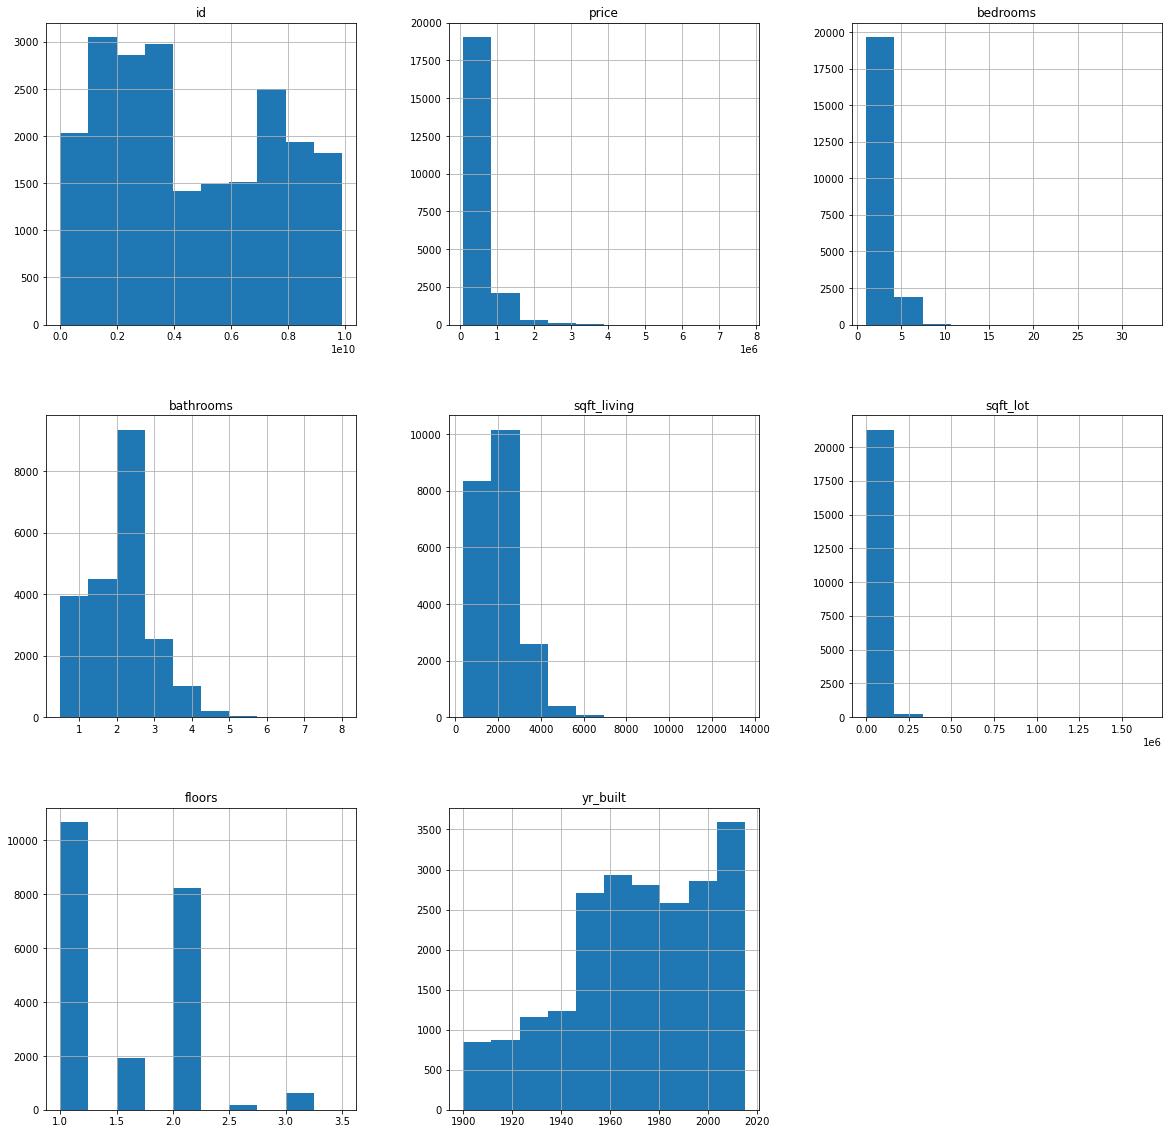

In [24]:
# Plot histograms to show distributions of datasets
df_limited.hist(figsize = (20,20));

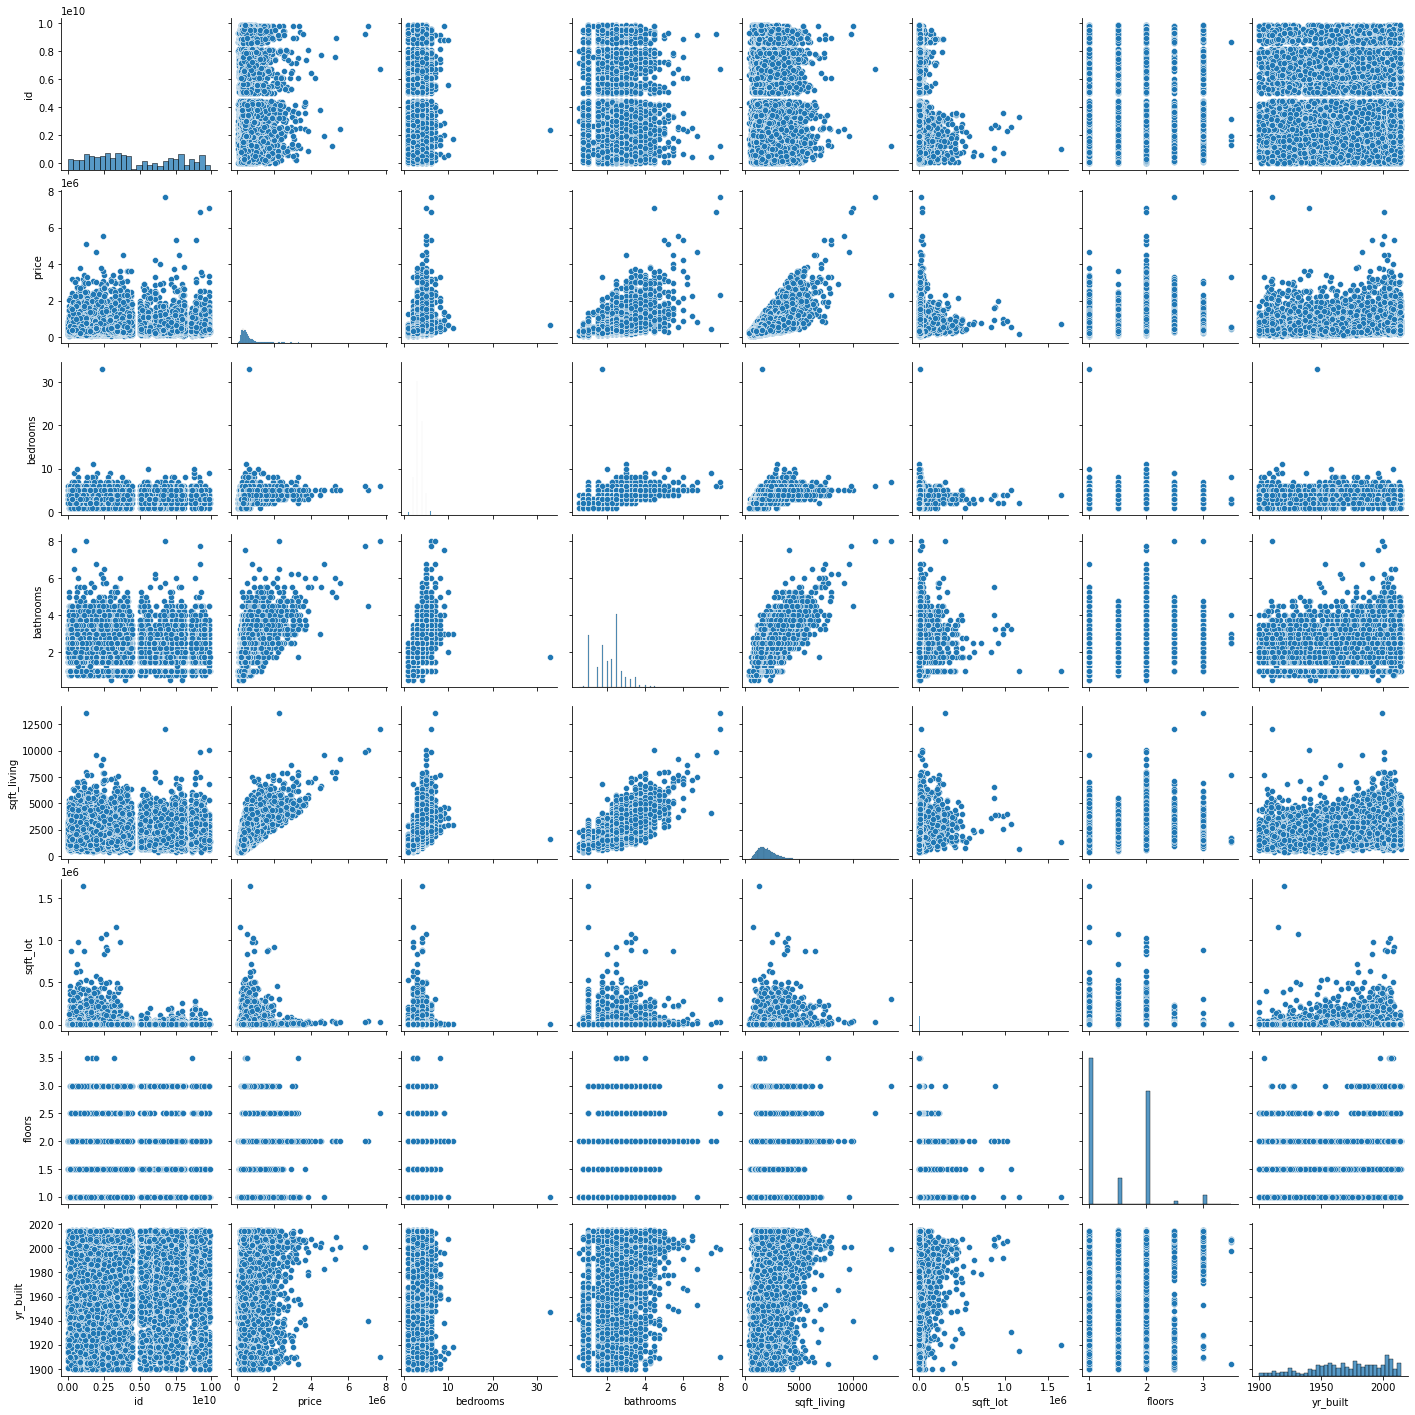

In [25]:
# Plot pairwise relationships in a dataset
sns.pairplot(df_limited)

This matrix plot returns scatterplots for relationships between two predictors. Some scatter plots reveal some sort of linear relationship between the predictors like bathrooms and sqft_living.  

In [26]:
for col in df_limited.columns:
    print ('{} : {}'.format (col, df_limited[col].nunique()))

id : 21420
price : 3622
bedrooms : 12
bathrooms : 29
sqft_living : 1034
sqft_lot : 9776
floors : 6
waterfront : 2
condition : 5
grade : 11
yr_built : 116


According to the type of variables, visualization and counts of unique variables, we can conclude that 'floors', 'condition', 'grade', and 'waterfront', are categorical variables. The linear regression model will not properly represent the categorical values, as it needs to be fed numeric values. For this reason, we will need to manage the categorical values, and convert them into formats that the linear regression model will better interpret.  

### Manage Categorical Features

For 'floors', 'condition', 'waterfront', and 'grade' implemented dummy coding with the pandas .get_dummies() method

In [27]:
# Create a list of all the categorical features
categorial_var = ['waterfront','floors', 'condition', 'grade']

# Create a dataframe with the new dummy columns created from the cols_to_transform list
ohc_df = pd.get_dummies(data = df_limited, columns = categorial_var , drop_first = True )
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,1951,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
# Modifide name of columns
ohc_df.columns = [col.replace ('.', '_') for col in ohc_df.columns]
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,1951,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
# Modifide name of columns
ohc_df.columns = [col.replace (' ', '_') for col in ohc_df.columns]
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,1951,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Use histograms to display the new numerical columns that now reflect the various categorical features.

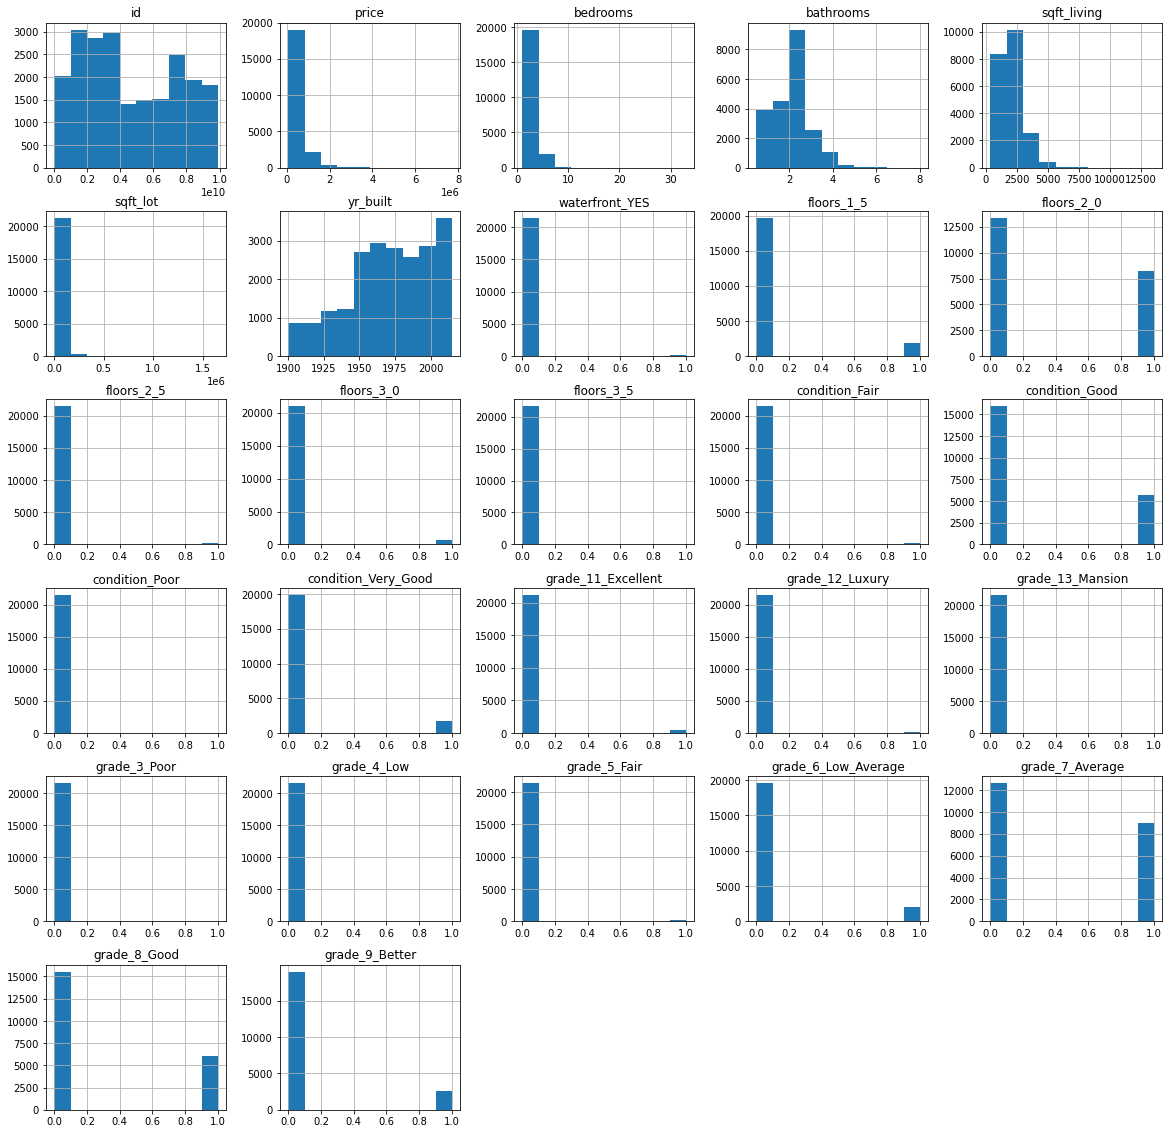

In [30]:
# Create histograms of the numeric features
ohc_df.hist(figsize = (20,20));

### Target Questions

Q1: How does the age of the houses impact the house price?

### Feature Engineering

Feature engineering is the process of selecting and transforming the most pertinent variables from raw data while developing a predictive model using machine learning or statistical modelling. 
Age of house can be one of the features that has an effect on price of houses. we can calculate age of house by subtracting 2022 from year of building. 

In [31]:
# Create new column
ohc_df['age'] = abs( ohc_df['yr_built'].sub(2022))

In [32]:
# To view a small sample of DataFrame object
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age
0,7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67
1,6414100192,538000.0,3,2.25,2570,7242,1951,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71
2,5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89
3,2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57
4,1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35


In [33]:
# Remove column from dataframe
ohc_df = ohc_df.drop(['yr_built'], axis=1)

In [34]:
# To view a small sample of DataFrame object
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age
0,7129300520,221900.0,3,1.00,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67
1,6414100192,538000.0,3,2.25,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71
2,5631500400,180000.0,2,1.00,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89
3,2487200875,604000.0,4,3.00,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57
4,1954400510,510000.0,3,2.00,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35


Let's view the distribution of the age feature with a histogram and scatterplot.

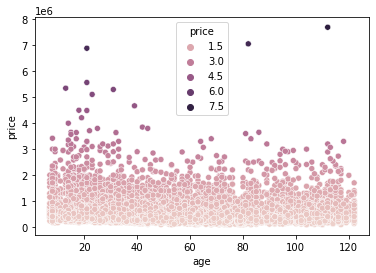

In [35]:
# Create a scatter plot of the age column
sns.scatterplot(x = ohc_df['age'], y= ohc_df['price'], hue = ohc_df['price']);

The scatter plot cannot provide much information, and we plot the histogram.

<AxesSubplot:xlabel='age', ylabel='Count'>

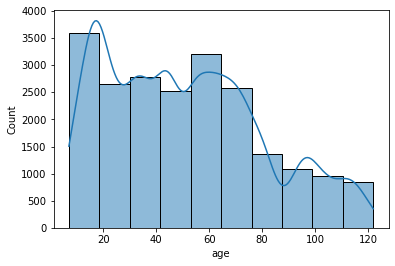

In [36]:
# Create seaborn distplot to visualize age value count distributions
sns.histplot(ohc_df['age'],bins=10, kde=True)

We can see that the number of houses in each age is not normally distributed. We know that normality helps our model predict with greater accuracy. By applying some transformations to this variable, and mapping its skewed distribution to a normal distribution, we can increase the performance of our models.



<AxesSubplot:>

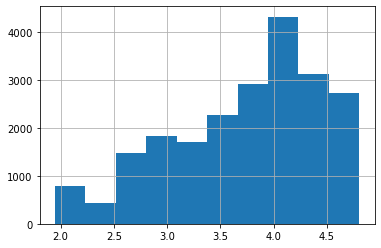

In [37]:
#Log transformation
np.log (ohc_df['age']).hist()

<AxesSubplot:>

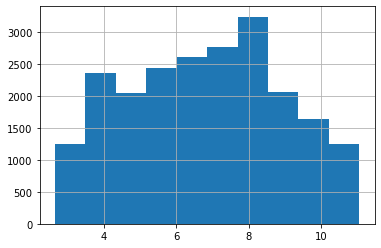

In [38]:
#Square root transformation and its distribution
normalize_df_age = (ohc_df['age']**(1/2))
normalize_df_age.hist()

Although our new variables don't look perfectly normal, there is an improvement in terms of skewness. 

<AxesSubplot:>

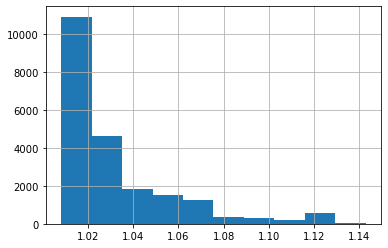

In [39]:
#Reciprocal transformation and its plot
(1/ohc_df['age']+1).hist()

<AxesSubplot:>

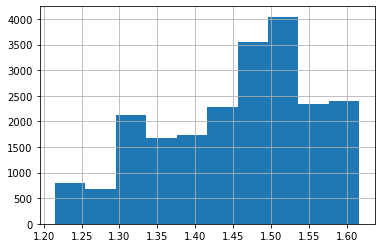

In [40]:
# Taking exponenent value as 1/8
(ohc_df['age']**(1/10)).hist()

Although our new variable does not look perfectly normal, there is an improvement in terms of skewness. We created a new dataframe focusing on the house age data. We can use the .groupby() method to group the data by age, and use a .agg() chain to fill in our dataframe with mean, minimum, and maximum values of the price per age.

In [41]:
#Generate descriptive statistics that summarize the central tendency,
#Dispersion and shape of a dataset's distribution, excluding NaN values
ohc_df['age'].describe()

count    21597.000000
mean        51.000324
std         29.375234
min          7.000000
25%         25.000000
50%         47.000000
75%         71.000000
max        122.000000
Name: age, dtype: float64

In [42]:
#Detect missing values 
ohc_df['age'].isnull().sum()

0

In [43]:
#Remove missing values
ohc_df.dropna(subset = ['age'],inplace=True)

In [44]:
#Detect missing values 
ohc_df['age'].isnull().sum()

0

The 'age' is pandas float data type. It is better to change it to an integer with the .astype() method.

In [45]:
#Chnag the data types to the specified type
ohc_df['age'] = ohc_df['age'].astype(int)

The lowest age for the house is 7, with the highest amount being 122. Age ranges can be determined by dividing this range into bins of the appropriate size to show the most expensive range of age. The number of bins was considered as 6.

In [46]:
# Determine production budget Bin Width 
age_range = ((ohc_df['age'].max()) - (ohc_df['age'].min()))/6

age_range

19.166666666666668

The bin width was determined 19.

In [47]:
# Create a list of integers, including infinity defined by NumPy.
bins = [7, 26, 45, 64, 83,102, np.inf]
# Create a name for the bins expressing the range for each bin.
names = ['7-26', '26-45',
         '45-64', '64-83', '83-102', '102-122']
# Make a new categorical column names budget range, which is made of the 
# Segments from the production budget column, 
ohc_df['age_cat'] = pd.cut(
    #Cut at the bin values and label with the names list.
    ohc_df['age'], bins=bins, labels=names)

# To view a small sample of DataFrame object
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age,age_cat
0,7129300520,221900.0,3,1.00,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67,64-83
1,6414100192,538000.0,3,2.25,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71,64-83
2,5631500400,180000.0,2,1.00,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89,83-102
3,2487200875,604000.0,4,3.00,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57,45-64
4,1954400510,510000.0,3,2.00,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35,26-45


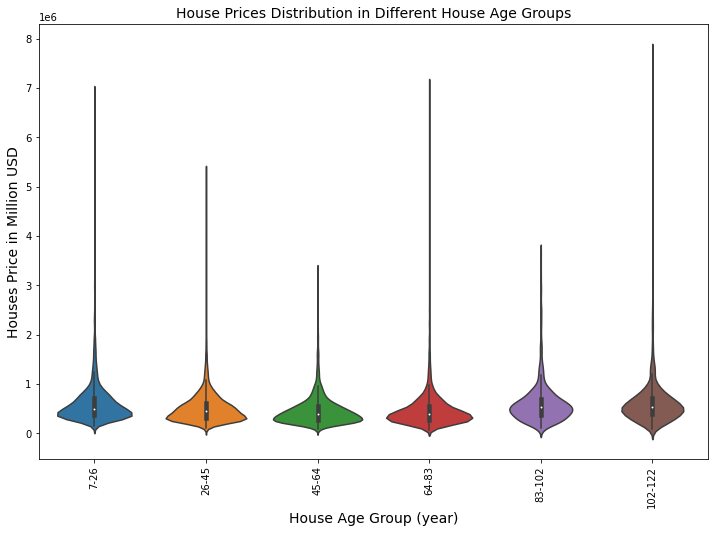

In [48]:
plt.figure(figsize=(12,8))
# Create a seaborn violin plot
sns.violinplot(x="age_cat", y="price", data=ohc_df)

#Set a title for the Axes
plt.title('House Prices Distribution in Different House Age Groups', fontsize=14)
# Label y-axis and set font size
plt.ylabel('Houses Price in Million USD', fontsize=14)
# Label x-axis and set font size
plt.xlabel('House Age Group (year)', fontsize=14)
# Set x ticks
plt.xticks(rotation='vertical')
# Show plot
plt.show()

As our violin plot showed, house age has a high range of prices. However, we have now created a new categorical variable. We will need to create dummy variables from this column  to be properly read by our model.

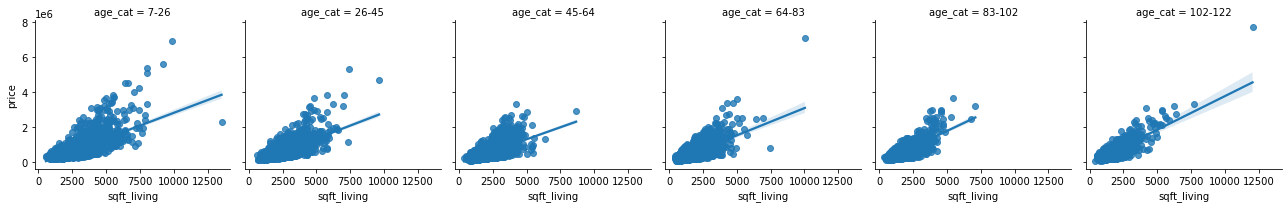

In [49]:
# Create a facet grid displaying regression plots of each type of region
g = sns.FacetGrid(ohc_df, col="age_cat") 
g.map(sns.regplot, "sqft_living", "price");

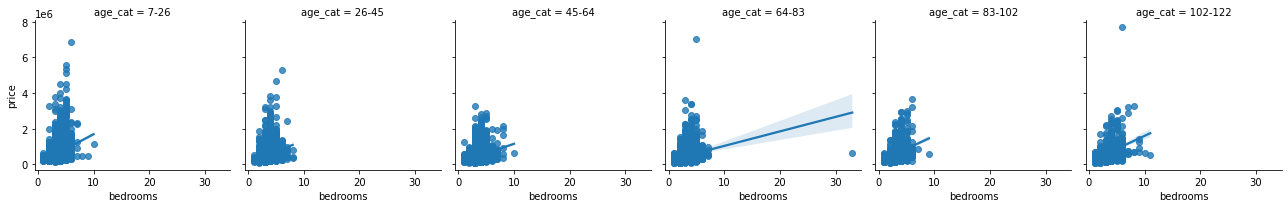

In [50]:
# Create a facet grid displaying regression plots of each type of region
g = sns.FacetGrid(ohc_df, col="age_cat") 
g.map(sns.regplot, "bedrooms", "price");

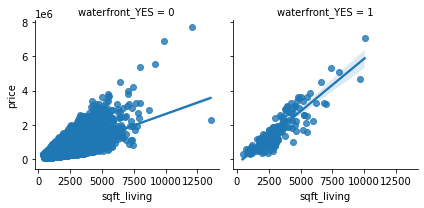

In [51]:
# Create a facet grid displaying regression plots of each type of region
g = sns.FacetGrid(ohc_df, col="waterfront_YES") 
g.map(sns.regplot, "sqft_living", "price");

In [52]:
# Create dataframe grouped by age with mean, min, max price aggregates
grouped_age = ohc_df.groupby('age_cat').agg({'price': ['mean', 'min', 'max']})
# Sort the dataframe by descending order of mean price values
grouped_age = grouped_age.sort_values(by=[('price','mean')], ascending=False)
# View new dataframe
grouped_age

price                     
                  mean       min        max
age_cat                                    
7-26     618235.274012  155000.0  6890000.0
102-122  608205.175172   80000.0  7700000.0
83-102   598961.214109  102500.0  3650000.0
26-45    526036.205766  100000.0  5300000.0
64-83    470969.133741   78000.0  7060000.0
45-64    469472.606798   86500.0  3300000.0

In [53]:
# Create dataframe grouped by age with mean, min, max price aggregates
grouped_age = ohc_df.groupby('age_cat').agg({'price': ['mean', 'min', 'max','count']})
# Sort the dataframe by descending order of mean price values

grouped_age = grouped_age.sort_values(by= 'age_cat' )
# View new dataframe
grouped_age

price                           
                  mean       min        max count
age_cat                                          
7-26     618235.274012  155000.0  6890000.0  5591
26-45    526036.205766  100000.0  5300000.0  4787
45-64    469472.606798   86500.0  3300000.0  4354
64-83    470969.133741   78000.0  7060000.0  3761
83-102   598961.214109  102500.0  3650000.0  1616
102-122  608205.175172   80000.0  7700000.0  1450

In [54]:
# Clean up the dataframe by remove multiindexing, and renaming the columns
grouped_age.columns = ['price_mean', 'price_min','price_max','price_count']

In [55]:
# Further clean the dataframe by changing the index
grouped_age.reset_index(level=0, inplace=True)
# View dataframe
grouped_age

,age_cat,price_mean,price_min,price_max,price_count
0,7-26,618235.274012,155000.0,6890000.0,5591
1,26-45,526036.205766,100000.0,5300000.0,4787
2,45-64,469472.606798,86500.0,3300000.0,4354
3,64-83,470969.133741,78000.0,7060000.0,3761
4,83-102,598961.214109,102500.0,3650000.0,1616
5,102-122,608205.175172,80000.0,7700000.0,1450


Let's Visualize the distribution of 'age' by their price mean with a scatterplot.

<Figure size 864x576 with 0 Axes>

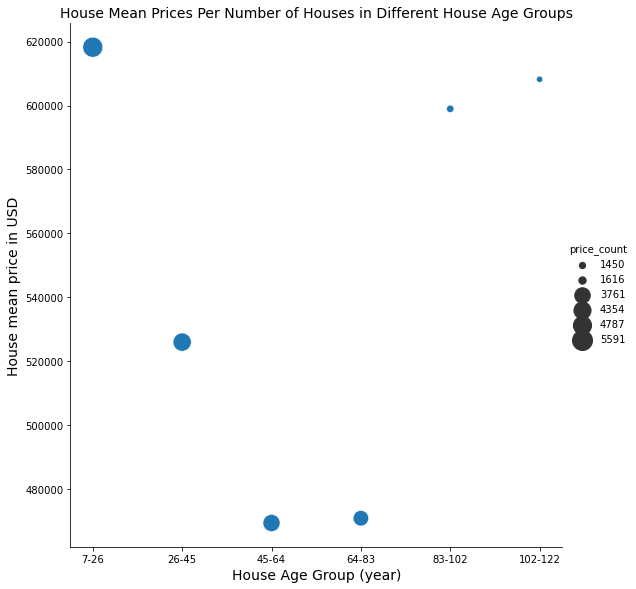

In [56]:
plt.figure(figsize=(12,8))
# Plot Houses Mean Prices Per Number of Houses in Different Age Group of the Houses
sns.relplot(x="age_cat", y="price_mean", size="price_count",
            sizes=(40, 400),
            height=8, data=grouped_age)

#Set a title for the Axes
plt.title('House Mean Prices Per Number of Houses in Different House Age Groups', fontsize=14)

#Set the label for the x-axis
plt.xlabel('House Age Group (year)', fontsize=14)

#Set the label for the y-axis
plt.ylabel('House mean price in USD', fontsize=14);

plt.show()

Now with the new 'grouped_age' dataframe, we can view the average price of a house based on age in a scatterplot. 

<AxesSubplot:xlabel='age', ylabel='price'>

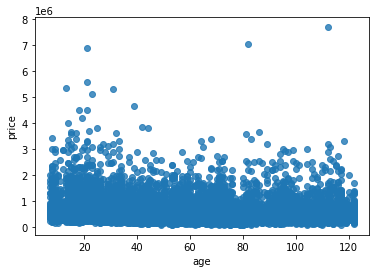

In [57]:
sns.regplot(data =ohc_df, x= ohc_df['age'], y=ohc_df['price'])

We also can use the join plot to have a better insight into one of our columns. 

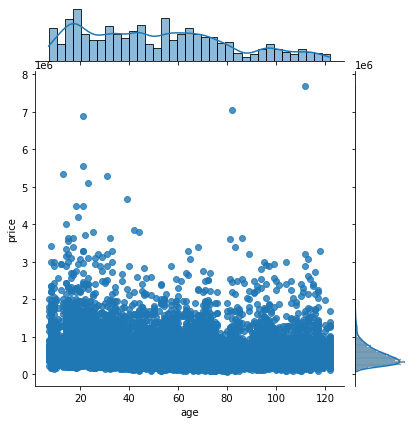

In [58]:
# Check for linearity in age feature of dataframe
sns.jointplot('age', 'price', data= ohc_df, kind='reg');

## Q2: How does house condition impact the house price? 

To answer this question, we can visualize the relation between house price and house condition. 

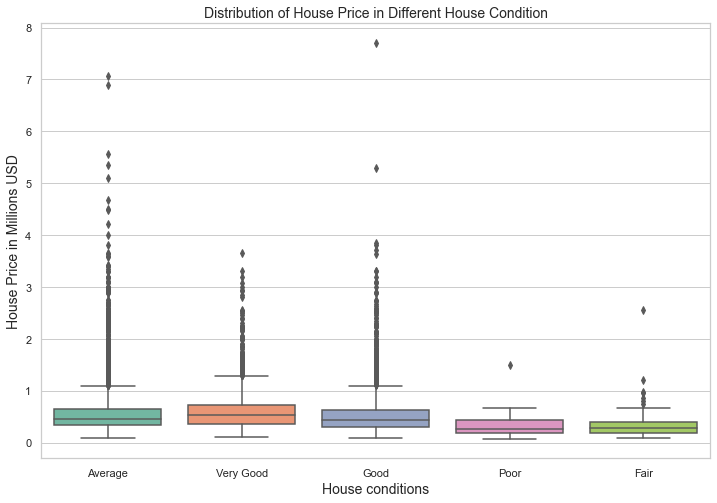

In [59]:
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12, 8))
# Draw a seaborn boxplot based on studio and domestic gross
sns.set(style="whitegrid")
sns.boxplot(x=df_limited['condition'],
            y=df_limited['price']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of House Price in Different House Condition',fontsize=14)
# Set x-axis label and font size
plt.xlabel('House conditions', fontsize=14)
# Set y-axis label
plt.ylabel('House Price in Millions USD',fontsize=14)
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

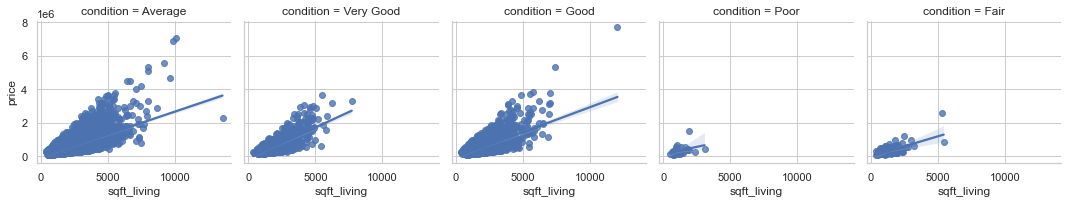

In [60]:
# Create a facet grid displaying regression plots of each type of region

g = sns.FacetGrid(df_limited, col="condition") 
g.map(sns.regplot, "sqft_living", "price");



The results from our exploration inform us that:
- House price and square footage of the house have a relatively linear relation. 
- By increasing the square footage of the house the house prices increase
- Most of the house are in average condition
- Very good condition in comparison to square footage of the house has a lower impact on house prices

# Model Data

## Linear Regression Assumptions


The dataset was cleaned and categorical variables were managed. By checking linearity, multicollinearity, and homoscedasticity we can check our dataset is agreeable with the assumptions of linear regression then we would have a feasible prediction.

## Linearity

For checking linearity, the dependent variable and independent variables should have a linear relationship. If they do not, our linear regression model will not do a great job at modeling the data. Pair plot is useful to check the linearity assumption.

In [61]:
# Drop a column
model_df = ohc_df.drop (['age_cat'], axis=1)

In [62]:
# To view a small sample of DataFrame object
model_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age
0,7129300520,221900.0,3,1.00,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67
1,6414100192,538000.0,3,2.25,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71
2,5631500400,180000.0,2,1.00,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89
3,2487200875,604000.0,4,3.00,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57
4,1954400510,510000.0,3,2.00,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35


At first, we build a simple linear relation model between two pairs of features and check their linearity.

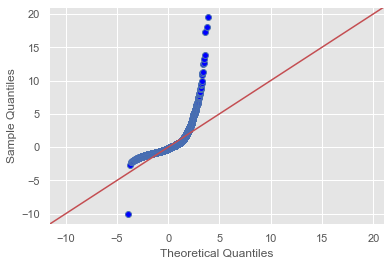

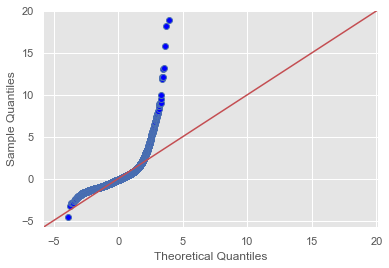

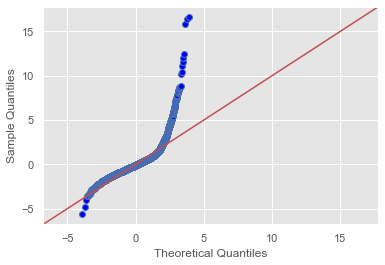

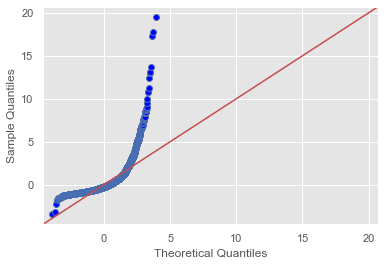

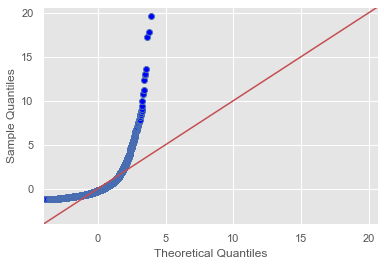

In [63]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

data = model_df
f = 'price~bedrooms'
f2 = 'price~bathrooms'
f3 = 'price~sqft_living'
f4 = 'price~sqft_lot'
f5 = 'price~age'



model = smf.ols(formula=f, data=data).fit()
model2 = smf.ols(formula=f2, data=data).fit()
model3 = smf.ols(formula=f3, data=data).fit()
model4 = smf.ols(formula=f4, data=data).fit()
model5 = smf.ols(formula=f5, data=data).fit()

resid1 = model.resid
resid2 = model2.resid
resid3 = model3.resid
resid4 = model4.resid
resid5 = model5.resid

fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True)

Normal Q-Q Plots are a direct visual assessment of how well our residuals match what we would expect from a normal distribution. The plot showed our features are not linearly related.  

## Multicollinearity

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. It makes it hard to interpret of model and also creates an overfitting problem. The first simple method to check multicollinearity is to plot the correlation matrix of all the independent variables. 

In [64]:
# Create a correlation table with 
correlation_df = model_df.corr()
correlation_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,-0.003599,-0.003326,0.026607,-0.000073,-0.005871,-0.010054,-0.012780,-0.025497,0.003471,-0.009534,-0.019837,-0.015084,-0.003880,-0.005110,-0.002903,-0.025640,-0.015476,-0.015575,0.042285,0.009121,-0.021617
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.264306,0.015896,0.232696,0.122845,0.020036,0.018132,-0.051432,-0.030759,-0.019886,0.057531,0.357589,0.291068,0.211806,-0.005155,-0.031618,-0.084549,-0.209463,-0.316053,0.004576,0.235859,-0.053953
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,-0.002127,0.044751,0.220934,0.057482,-0.075682,0.001076,-0.049463,-0.009841,-0.032520,0.027500,0.116596,0.062257,0.039026,-0.017434,-0.068012,-0.113175,-0.239492,-0.104791,0.073140,0.160294,-0.155670
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.063629,-0.139381,0.518412,0.081098,0.084248,0.018195,-0.075933,-0.166756,-0.042932,-0.034765,0.247293,0.159734,0.095118,-0.012087,-0.055599,-0.138740,-0.366185,-0.313457,0.189426,0.264756,-0.507173
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.104637,-0.058504,0.419928,0.100543,-0.054066,0.007054,-0.063984,-0.083850,-0.033246,-0.018284,0.345964,0.238136,0.144424,-0.011565,-0.053935,-0.127198,-0.312486,-0.358915,0.071115,0.318499,-0.318152
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,0.021459,0.014043,0.019688,0.004704,-0.043789,-0.005351,0.037871,0.013284,0.006265,-0.014452,0.077104,0.061699,0.007767,-0.000348,0.000440,0.022931,-0.019116,-0.067791,-0.023923,0.049646,-0.052946
waterfront_YES,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,1.000000,0.006146,0.015508,0.005988,0.006371,-0.001486,-0.000954,0.009785,0.012406,0.013637,0.068410,0.082899,-0.002025,-0.000561,-0.002919,0.012691,-0.007301,-0.045482,-0.011317,0.007487,0.024487
floors_1_5,-0.003326,0.015896,0.044751,-0.139381,-0.058504,0.014043,0.006146,1.000000,-0.244525,-0.026994,-0.053147,-0.005609,0.001782,0.065550,0.010845,0.109923,-0.029412,-0.020037,-0.007644,-0.002120,-0.001790,0.025715,0.072945,0.070271,-0.048762,-0.063120,0.380590
floors_2_0,0.026607,0.232696,0.220934,0.518412,0.419928,0.019688,0.015508,-0.244525,1.000000,-0.068036,-0.133953,-0.014136,-0.049430,-0.239017,-0.023580,-0.139297,0.120957,0.055155,0.011828,-0.005342,-0.027775,-0.081759,-0.232866,-0.286645,0.143058,0.274077,-0.526998
floors_2_5,-0.000073,0.122845,0.057482,0.081098,0.100543,0.004704,0.005988,-0.026994,-0.068036,1.000000,-0.014788,-0.001560,-0.007719,-0.004061,-0.003178,0.012629,0.044073,0.011230,0.063713,-0.000590,-0.003066,-0.009226,-0.024292,-0.056688,0.009327,0.043736,0.028586


The .corr() method is a Pandas method that allows us to compute a pairwise correlation on a dataframe’s columns. With the price column and row, we can see which features have the highest correlation with our target. Based on the table, we can see that bedrooms, bathrooms, and sqft_living, have a very high correlation between prices. We can also generate very neat heat maps of the correlation coefficients that are generated when we run .corr(). We can do this by leveraging Seaborn.

<AxesSubplot:>

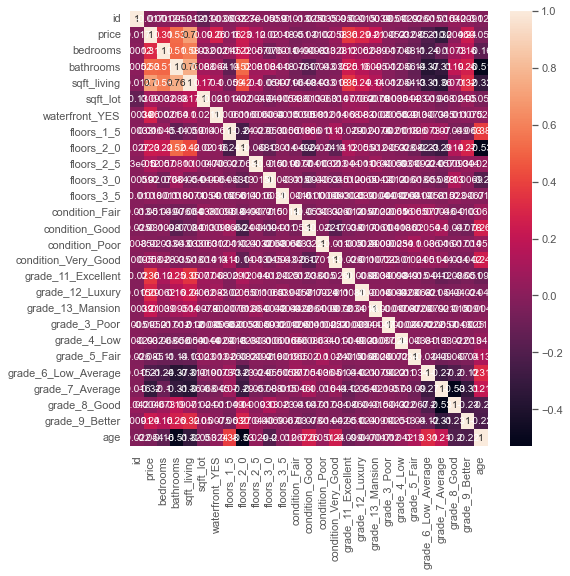

In [65]:
# Set figure size
plt.figure(figsize=(8,8))

# Seaborn heatmap visualization
sns.heatmap(ohc_df.corr(), annot=True)

<AxesSubplot:>

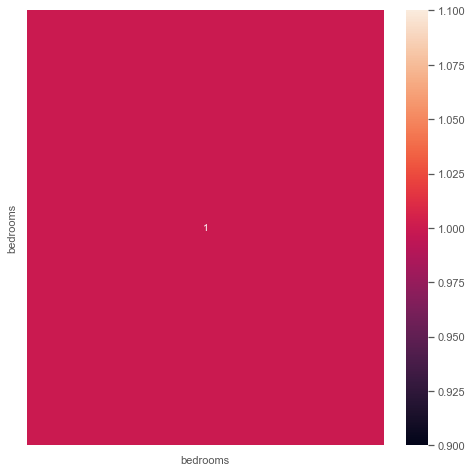

In [66]:
# Set figure size
plt.figure(figsize=(8,8))
# Create a dataframe from our .corr() method
m_blue_corr = model_df.corr()['bedrooms'][:].sort_values(axis=0, ascending=False)

# Gather columns/data that has a correlation value that is statistically significant - we are filtering for anything 0.5+
m_blue_corr_cols = [x for x,corr in m_blue_corr.iteritems() if abs(corr>0.75)]

# Seaborn heatmap visualization
# Here is where the plot is made!
sns.heatmap(ohc_df[m_blue_corr_cols].corr(), annot=True)

Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. We take 0.75 as a cut-off. It seems there is not a high correlation between variables, so there is no need to remove any of them to remove collinear features. 

## Baseline Model

We did the EDA of our dataset and clear some relations between our variables. After that, we checked the linearity and multicollinearity of our dataset because it affects the interpretability of a regression model since it compromises the statistical significance of independent variables. Now we build our baseline model and will evaluate the final model with it. 

A baseline model is essentially a simple model that acts as a reference in a machine learning project. we made our baseline model with Sci-kit Learn. The first step is to create the X and y partitions of our data.

In [67]:
# Rename our dataframe
p_df = model_df
# Create our X and y
y = p_df[['price']]
X = p_df.drop(['price'], axis=1)

In [68]:
# Print a concise summary of a DataFrame
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   21597 non-null  float64
dtypes: float64(1)
memory usage: 853.5 KB


In [69]:
# Print a concise summary of a DataFrame
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21597 non-null  int64  
 1   bedrooms             21597 non-null  int64  
 2   bathrooms            21597 non-null  float64
 3   sqft_living          21597 non-null  int64  
 4   sqft_lot             21597 non-null  int64  
 5   waterfront_YES       21597 non-null  uint8  
 6   floors_1_5           21597 non-null  uint8  
 7   floors_2_0           21597 non-null  uint8  
 8   floors_2_5           21597 non-null  uint8  
 9   floors_3_0           21597 non-null  uint8  
 10  floors_3_5           21597 non-null  uint8  
 11  condition_Fair       21597 non-null  uint8  
 12  condition_Good       21597 non-null  uint8  
 13  condition_Poor       21597 non-null  uint8  
 14  condition_Very_Good  21597 non-null  uint8  
 15  grade_11_Excellent   21597 non-null 

The second step is to split our data into train and test sets by importing train_test_split from sklearn

In [70]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

For this model we will use a pretty common 80% train, 20% test ratio.

In [71]:
# Create train and test datasets from data frame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We will import the LinearRegression module and fit a model to our data. This is where we use the independent variables in our training data to 'teach' the model the patterns found within them so that it can predict the price of a house. We will use the prediction method to create our predictions.

In [72]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# Create linear regression object
linreg = LinearRegression()
# Fit lr object to training data
linreg.fit(X_train, y_train)

# Create price predictions on train and test data from the independent variables
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

By calculating the Mean Squared Error (MSE) we can evaluate our prediction price. The MSE measures how close a regression line is to a set of data points. There is no correct value for MSE. Simply put, the lower the value the better, and 0 means the model is perfect.

In [73]:
# Compute MSE for train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 43169297277.21718
Test Mean Squared Error: 46572160667.56113


Both the train and test sets have high MSE. If the test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases. So the model is poor at making predictions in general, and it is underfitting.

The Q-Q plot helps us to check whether the prediction has a common distribution with theorized distribution

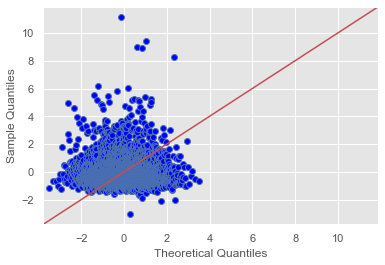

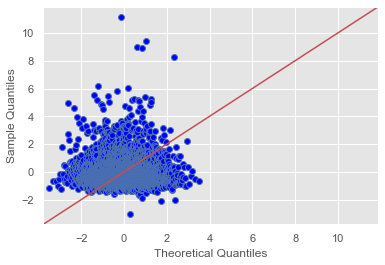

In [74]:
# Import scipy.stats
import scipy.stats as stats
# Import statsmodels.api
import statsmodels.api as sm
# Create a qqplot showing distribution of data points compared to theorized distribution
sm.qqplot(y_hat_test, dist=stats.norm, line='45', fit=True)

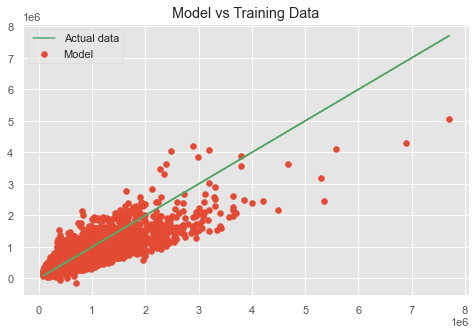

In [75]:
# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatterplot on the figure of y-train
plt.scatter(y_train, y_hat_train, label='Model')
# Plot y_hat_train
plt.plot(y_train, y_train, label='Actual data', color='g')
plt.title('Model vs Training Data')
plt.legend();

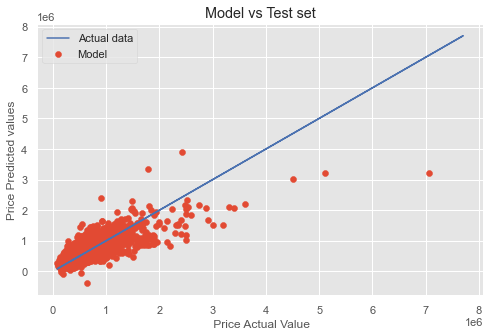

In [76]:
# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_test, y_hat_test, label='Model')
plt.plot(y_train, y_train, label='Actual data', color='b')
plt.title('Model vs Test set')
plt.xlabel(' Price Actual Value')
plt.ylabel ('Price Predicted values')
plt.legend();

## Statsmodels Linear Regression

In [77]:
# Import OLS from statsmodels
from statsmodels.formula.api import ols

In [78]:
# View the columns in our dataframe
p_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront_YES', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'age'],
      dtype='object')

In [79]:
# Name the dependent and independent variables to be fed into our model
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront_YES', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'age']

# Create the predictors object to be used in the OLS model
predictors = '+'.join(x_cols)
# Name the formula to create our model
formula = outcome + '~' + predictors
# Create our linear regression model
model = ols(formula=formula, data=model_df).fit()
# Call summary to return data on model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1795.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:27   Log-Likelihood:            -2.9524e+05
No. Observations:               21597   AIC:                         5.905e+05
Df Residuals:                   21571   BIC:                         5.907e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.522e+05   1.22e+04     28.910      0.000    3.28e+05    3.76e+05
bedrooms            -2.755e+04   2014.830    -13.671      0.000   -3.15e+04   -2.36e+04
bathrooms            5.645e+04   3351.130     16.846      0.000    4.99e+04     6.3e+04
sqft_living           148.6052      3.321     44.749      0.000     142.096     155.114
sqft_lot               -0.2621      0.035     -7.411      0.000      -0.331      -0.193
waterfront_YES       7.294e+05   1.76e+04     41.380      0.000    6.95e+05    7.64e+05
floors_1_5            240.0399   5513.425      0.044      0.965   -1.06e+04     1.1e+04
floors_2_0           1975.3131   4061.598      0.486      0.627   -5985.720    9936.346
floors_2_5            1.05e+05   1.69e+04      6.206      0.000    7.19e+04    1.38e+05
floors_3_0           1.301e+05   9491.001     13.711      0.000    1.12e+05    1.49e+05
floors_3_5           1.903e+05   7.93e+04      2.399      0.016    3.48e+04    3.46e+05
condition_Fair       -3.31e+04   1.64e+04     -2.024      0.043   -6.52e+04   -1047.733
condition_Good       1.488e+04   3548.151      4.192      0.000    7920.709    2.18e+04
condition_Poor      -3.421e+04   3.93e+04     -0.871      0.383   -1.11e+05    4.27e+04
condition_Very_Good  5.377e+04   5717.876      9.404      0.000    4.26e+04     6.5e+04
grade_11_Excellent   2.663e+05   1.24e+04     21.434      0.000    2.42e+05    2.91e+05
grade_12_Luxury        7.4e+05   2.37e+04     31.169      0.000    6.93e+05    7.87e+05
grade_13_Mansion     1.914e+06   5.95e+04     32.144      0.000     1.8e+06    2.03e+06
grade_3_Poor        -5.875e+05    2.1e+05     -2.801      0.005   -9.99e+05   -1.76e+05
grade_4_Low         -5.423e+05   4.16e+04    -13.038      0.000   -6.24e+05   -4.61e+05
grade_5_Fair        -5.632e+05   1.65e+04    -34.042      0.000   -5.96e+05   -5.31e+05
grade_6_Low_Average -5.111e+05   1.02e+04    -50.194      0.000   -5.31e+05   -4.91e+05
grade_7_Average     -4.275e+05   8368.110    -51.081      0.000   -4.44e+05   -4.11e+05
grade_8_Good        -3.328e+05   7672.231    -43.376      0.000   -3.48e+05   -3.18e+05
grade_9_Better      -1.812e+05   7659.141    -23.662      0.000   -1.96e+05   -1.66e+05
age                  3479.2064     70.976     49.020      0.000    3340.089    3618.324
==============================================================================
Omnibus:                    12141.436   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           391289.623
Skew:                           2.131   Prob(JB):                         0.00
Kurtosis:                      23.412   Cond. No.                     6.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

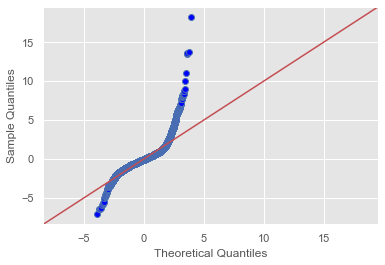

In [80]:
plt.style.use('ggplot')
resid1 = model.resid


fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

## Interpreting the Regression Results

Important components within the results include:
. Adjusted. R-squared reflects the fit of the model. The Adj R-squared value is 0.67 which indicates we should improve our model.
. P >|t| is the p-value. A p-value of less than 0.05 is considered to be statistically significant

To improve our model we can make a new dataframe by removing variables with p-values below our alpha.

In [81]:
# Remove the features with p-values above alpha
p_df = model_df.drop(['floors_1_5', 'floors_2_0', 'floors_3_5', 'condition_Poor'], axis=1)

In [82]:
# Check changes occurred
p_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront_YES', 'floors_2_5', 'floors_3_0', 'condition_Fair',
       'condition_Good', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'age'],
      dtype='object')

In [83]:
# Name the dependent and independent variables to be fed into our model
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront_YES', 'floors_2_5', 'floors_3_0', 'condition_Fair',
       'condition_Good', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'age']

# Create the predictors object to be used in the OLS model
predictors = '+'.join(x_cols)
# Name the formula to create our model
formula = outcome + '~' + predictors
# Create our linear regression model
model = ols(formula=formula, data=model_df).fit()
# Call summary to return data on model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     2137.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:27   Log-Likelihood:            -2.9524e+05
No. Observations:               21597   AIC:                         5.905e+05
Df Residuals:                   21575   BIC:                         5.907e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.534e+05   1.19e+04     29.685      0.000     3.3e+05    3.77e+05
bedrooms            -2.759e+04   2006.568    -13.749      0.000   -3.15e+04   -2.37e+04
bathrooms            5.693e+04   3272.588     17.395      0.000    5.05e+04    6.33e+04
sqft_living           148.5040      3.321     44.720      0.000     141.995     155.013
sqft_lot               -0.2639      0.035     -7.483      0.000      -0.333      -0.195
waterfront_YES        7.29e+05   1.76e+04     41.361      0.000    6.94e+05    7.64e+05
floors_2_5           1.038e+05   1.67e+04      6.202      0.000     7.1e+04    1.37e+05
floors_3_0           1.284e+05   8991.780     14.282      0.000    1.11e+05    1.46e+05
condition_Fair      -3.292e+04   1.63e+04     -2.014      0.044    -6.5e+04    -885.826
condition_Good       1.469e+04   3498.534      4.199      0.000    7834.528    2.15e+04
condition_Very_Good  5.375e+04   5692.558      9.442      0.000    4.26e+04    6.49e+04
grade_11_Excellent   2.663e+05   1.24e+04     21.431      0.000    2.42e+05    2.91e+05
grade_12_Luxury       7.42e+05   2.37e+04     31.286      0.000    6.95e+05    7.88e+05
grade_13_Mansion     1.914e+06   5.95e+04     32.145      0.000     1.8e+06    2.03e+06
grade_3_Poor        -5.878e+05    2.1e+05     -2.802      0.005   -9.99e+05   -1.77e+05
grade_4_Low          -5.44e+05   4.16e+04    -13.089      0.000   -6.25e+05   -4.63e+05
grade_5_Fair        -5.649e+05   1.65e+04    -34.311      0.000   -5.97e+05   -5.33e+05
grade_6_Low_Average -5.118e+05   1.01e+04    -50.505      0.000   -5.32e+05   -4.92e+05
grade_7_Average      -4.28e+05   8304.656    -51.540      0.000   -4.44e+05   -4.12e+05
grade_8_Good        -3.329e+05   7656.532    -43.481      0.000   -3.48e+05   -3.18e+05
grade_9_Better      -1.812e+05   7659.252    -23.664      0.000   -1.96e+05   -1.66e+05
age                  3467.8501     64.394     53.853      0.000    3341.633    3594.067
==============================================================================
Omnibus:                    12123.937   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           390044.903
Skew:                           2.127   Prob(JB):                         0.00
Kurtosis:                      23.380   Cond. No.                     6.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the last model, we can conclude that:

- The Adj R-value is 0.675 which means 67.5% of the variations in price y are explained by the features in our model.
- The variables have high values for coefficients and grade_13_Mansion has the highest coefficient. Other determiners for house price are waterfront views, condition, floors, age, and bathrooms.

## Model Refinements

According to the model interpretation, we should improve our model's predicted performance. The first step can be to check the outliers. There are many techniques to identify outliers. the Z-score is one of the simplest and one of the most popular techniques for outlier detection that works well for several  cases.

In [84]:
# Import stats
from scipy import stats

# Create the z_scores with stats library
z_scores = stats.zscore(model_df)

# Get the absolute z-scores
abs_z_scores = np.abs(z_scores)
# Filter those values that are within the 3rd standard deviation of our columns
filtered_entries = (abs_z_scores < 3).all(axis=1)
out_df = model_df[filtered_entries]

In [85]:
# Check the size of the dataframe
out_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14750 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14750 non-null  int64  
 1   price                14750 non-null  float64
 2   bedrooms             14750 non-null  int64  
 3   bathrooms            14750 non-null  float64
 4   sqft_living          14750 non-null  int64  
 5   sqft_lot             14750 non-null  int64  
 6   waterfront_YES       14750 non-null  uint8  
 7   floors_1_5           14750 non-null  uint8  
 8   floors_2_0           14750 non-null  uint8  
 9   floors_2_5           14750 non-null  uint8  
 10  floors_3_0           14750 non-null  uint8  
 11  floors_3_5           14750 non-null  uint8  
 12  condition_Fair       14750 non-null  uint8  
 13  condition_Good       14750 non-null  uint8  
 14  condition_Poor       14750 non-null  uint8  
 15  condition_Very_Good  14750 non-null 

In [86]:
# Check the size of the dataframe
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21597 non-null  int64  
 1   price                21597 non-null  float64
 2   bedrooms             21597 non-null  int64  
 3   bathrooms            21597 non-null  float64
 4   sqft_living          21597 non-null  int64  
 5   sqft_lot             21597 non-null  int64  
 6   waterfront_YES       21597 non-null  uint8  
 7   floors_1_5           21597 non-null  uint8  
 8   floors_2_0           21597 non-null  uint8  
 9   floors_2_5           21597 non-null  uint8  
 10  floors_3_0           21597 non-null  uint8  
 11  floors_3_5           21597 non-null  uint8  
 12  condition_Fair       21597 non-null  uint8  
 13  condition_Good       21597 non-null  uint8  
 14  condition_Poor       21597 non-null  uint8  
 15  condition_Very_Good  21597 non-null 

By comparing the count of the filtred dataframe with the original dataframe it showed about 31% of the data can be considered outliers.  When you determine outliers there are several ways to handle them like deleting them or using log, winsorize and similar methods. In the first step, we can try to build our model based on deleting the outliers. We can build our model based on the filtered dataframe to check the performance of prediction after deleting the outliers.

In [87]:
out_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront_YES', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'age'],
      dtype='object')

## Deleting Outliers

In [88]:
# Create non-outlier model
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront_YES', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'age']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_out = ols(formula=formula, data=out_df).fit()
model_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:27   Log-Likelihood:            -1.9759e+05
No. Observations:               14750   AIC:                         3.952e+05
Df Residuals:                   14739   BIC:                         3.953e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.738e+05   1.16e+04     32.209      0.000    3.51e+05    3.97e+05
bedrooms            -2.169e+04   2086.765    -10.392      0.000   -2.58e+04   -1.76e+04
bathrooms            5.139e+04   3351.799     15.331      0.000    4.48e+04     5.8e+04
sqft_living           112.2680      3.285     34.176      0.000     105.829     118.707
sqft_lot               -0.8564      0.103     -8.332      0.000      -1.058      -0.655
waterfront_YES      -2.385e-10   9.61e-11     -2.483      0.013   -4.27e-10   -5.02e-11
floors_1_5            3.08e-11   1.95e-11      1.578      0.114   -7.45e-12     6.9e-11
floors_2_0           1.326e+04   3543.202      3.743      0.000    6316.237    2.02e+04
floors_2_5           9.782e-11    2.3e-11      4.250      0.000    5.27e-11    1.43e-10
floors_3_0           4.935e-13    4.7e-14     10.510      0.000    4.01e-13    5.86e-13
floors_3_5                   0          0        nan        nan           0           0
condition_Fair               0          0        nan        nan           0           0
condition_Good       9877.6036   3185.186      3.101      0.002    3634.241    1.61e+04
condition_Poor               0          0        nan        nan           0           0
condition_Very_Good          0          0        nan        nan           0           0
grade_11_Excellent           0          0        nan        nan           0           0
grade_12_Luxury              0          0        nan        nan           0           0
grade_13_Mansion             0          0        nan        nan           0           0
grade_3_Poor                 0          0        nan        nan           0           0
grade_4_Low                  0          0        nan        nan           0           0
grade_5_Fair                 0          0        nan        nan           0           0
grade_6_Low_Average          0          0        nan        nan           0           0
grade_7_Average     -3.808e+05   7446.031    -51.143      0.000   -3.95e+05   -3.66e+05
grade_8_Good        -2.786e+05   6772.652    -41.135      0.000   -2.92e+05   -2.65e+05
grade_9_Better      -1.269e+05   6695.646    -18.947      0.000    -1.4e+05   -1.14e+05
age                  3324.7996     70.335     47.271      0.000    3186.934    3462.665
==============================================================================
Omnibus:                     2504.991   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7071.406
Skew:                           0.908   Prob(JB):                         0.00
Kurtosis:                       5.865   Cond. No.                     1.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

As it can be seen in the table the model has a much lower adj. R squared value. Let's leave our outliers in the dataset.

## Feature Scaling and Normalization

Let's have a look at our features: 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' and 'age' to check how we can transform each one of them!

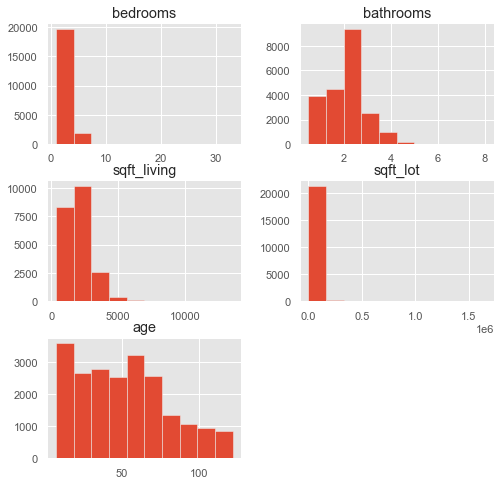

In [89]:
# Create histograms of the numeric features
specific_features = ohc_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'age']]

specific_features.hist(figsize = (8,8));



The plot show that skewness is an issue for all of our variables, and that some features e.g. 'sqft_lot' are much bigger in magnitude than others!
We can transform our data in two phases: first, try to make our data look more normal, and second, perform feature scaling to manage the difference in magnitude!

### Log Transformation

 One common option for transforming non-normal variable distributions is to try applying a logarithmic function and observe its impact on the distribution.


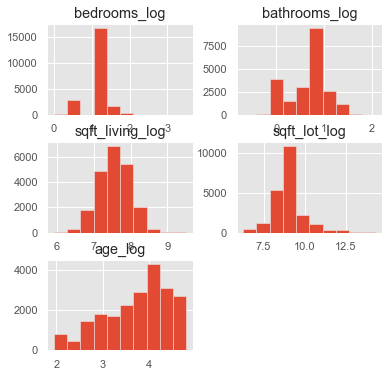

In [90]:
# Create new log transfromed features for a new dataframe
data_log= pd.DataFrame([])

data_log['bedrooms_log'] = np.log(model_df['bedrooms'])
data_log['bathrooms_log'] = np.log(model_df['bathrooms'])
data_log['sqft_living_log'] = np.log(model_df['sqft_living'])
data_log['sqft_lot_log'] = np.log(model_df['sqft_lot'])
data_log['age_log'] = np.log(model_df['age'])
data_log.hist(figsize  = [6, 6]);

In [91]:
# Create a new linear model with the new log transformed features
X = data_log
y = model_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     3091.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:30   Log-Likelihood:            -3.0156e+05
No. Observations:               21597   AIC:                         6.031e+05
Df Residuals:                   21591   BIC:                         6.032e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.273e+06   5.22e+04    -81.817      0.000   -4.38e+06   -4.17e+06
bedrooms_log    -2.521e+05   8954.039    -28.159      0.000    -2.7e+05   -2.35e+05
bathrooms_log    8.422e+04   8584.039      9.811      0.000    6.74e+04    1.01e+05
sqft_living_log  6.594e+05   8309.194     79.356      0.000    6.43e+05    6.76e+05
sqft_lot_log    -3.369e+04   2364.010    -14.250      0.000   -3.83e+04   -2.91e+04
age_log          1.013e+05   3375.429     30.021      0.000    9.47e+04    1.08e+05
==============================================================================
Omnibus:                    19454.025   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1761977.170
Skew:                           3.979   Prob(JB):                         0.00
Kurtosis:                      46.528   Cond. No.                         346.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Combine these log features with categorical features of original dataframe
df_log = pd.concat([data_log, model_df], axis=1)
df_log.columns

Index(['bedrooms_log', 'bathrooms_log', 'sqft_living_log', 'sqft_lot_log',
       'age_log', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront_YES', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'age'],
      dtype='object')

In [93]:
# Drop the nonlogged versions of our log features from the dataframe
df_log_2 = df_log.drop(['id','bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot',
       'age'], axis=1)

In [94]:
# Create a new model
X = df_log_2.drop(['price'], axis=1)
y = df_log_2['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:30   Log-Likelihood:            -2.9625e+05
No. Observations:               21597   AIC:                         5.925e+05
Df Residuals:                   21571   BIC:                         5.928e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.288e+06   5.44e+04    -23.665      0.000   -1.39e+06   -1.18e+06
bedrooms_log         -7.95e+04   7250.789    -10.964      0.000   -9.37e+04   -6.53e+04
bathrooms_log        5.774e+04   6936.179      8.325      0.000    4.41e+04    7.13e+04
sqft_living_log      2.958e+05   7786.283     37.995      0.000    2.81e+05    3.11e+05
sqft_lot_log        -4.436e+04   1988.115    -22.314      0.000   -4.83e+04   -4.05e+04
age_log              1.195e+05   3296.083     36.247      0.000    1.13e+05    1.26e+05
waterfront_YES       7.798e+05   1.85e+04     42.218      0.000    7.44e+05    8.16e+05
floors_1_5           2.654e+04   5655.639      4.692      0.000    1.55e+04    3.76e+04
floors_2_0          -4403.6585   4500.226     -0.979      0.328   -1.32e+04    4417.116
floors_2_5           1.395e+05   1.78e+04      7.839      0.000    1.05e+05    1.74e+05
floors_3_0           7.942e+04   1.06e+04      7.496      0.000    5.87e+04       1e+05
floors_3_5           1.686e+05   8.32e+04      2.027      0.043    5544.223    3.32e+05
condition_Fair      -1.005e+04   1.71e+04     -0.587      0.558   -4.37e+04    2.35e+04
condition_Good       1.958e+04   3767.966      5.197      0.000    1.22e+04     2.7e+04
condition_Poor       4667.4161   4.11e+04      0.114      0.910   -7.59e+04    8.53e+04
condition_Very_Good  7.089e+04   6001.503     11.811      0.000    5.91e+04    8.26e+04
grade_11_Excellent   3.542e+05   1.28e+04     27.567      0.000    3.29e+05    3.79e+05
grade_12_Luxury      9.595e+05   2.44e+04     39.366      0.000    9.12e+05    1.01e+06
grade_13_Mansion     2.389e+06   6.15e+04     38.864      0.000    2.27e+06    2.51e+06
grade_3_Poor        -4.869e+05    2.2e+05     -2.215      0.027   -9.18e+05    -5.6e+04
grade_4_Low         -5.059e+05   4.38e+04    -11.539      0.000   -5.92e+05    -4.2e+05
grade_5_Fair        -5.815e+05   1.74e+04    -33.334      0.000   -6.16e+05   -5.47e+05
grade_6_Low_Average -5.701e+05   1.06e+04    -53.929      0.000   -5.91e+05   -5.49e+05
grade_7_Average     -5.282e+05   8404.375    -62.844      0.000   -5.45e+05   -5.12e+05
grade_8_Good        -4.289e+05   7716.783    -55.579      0.000   -4.44e+05   -4.14e+05
grade_9_Better       -2.36e+05   7916.094    -29.809      0.000   -2.51e+05    -2.2e+05
==============================================================================
Omnibus:                    14027.453   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           659168.926
Skew:                           2.514   Prob(JB):                         0.00
Kurtosis:                      29.594   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

 We can observe that by transforming non-normally distributed features using log transformations, The  𝑅2  value of the model did not increase. This method did not lead to an improved model. A good rule of thumb is, however, to check your features for normality, and scale your features so they have similar magnitudes. 
 We can explore transformations to test for model performance. Other popular transformations include: Min-max scaling, Standardization, Mean normalization, Unit vector transformation.

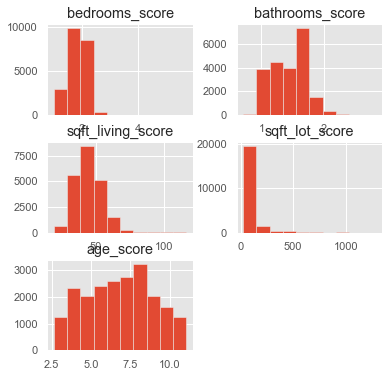

In [95]:
# Create score root features for a new dataframe
data_score_root= pd.DataFrame([])

data_score_root['bedrooms_score'] = model_df['bedrooms'] **(1/2)
data_score_root['bathrooms_score'] = model_df['bathrooms']**(1/2)
data_score_root['sqft_living_score'] = model_df['sqft_living']**(1/2)
data_score_root['sqft_lot_score'] = model_df['sqft_lot']**(1/2)
data_score_root['age_score'] = model_df['age']**(1/2)
data_score_root.hist(figsize  = [6, 6]);


We can create a new dataframe by selecting columns from log transformation and score root transformation.

In [96]:
# Create a new dataframe with original categorical features and transformed features
final_df = pd.concat([data_score_root, df_log_2], axis=1)
final_df.columns

Index(['bedrooms_score', 'bathrooms_score', 'sqft_living_score',
       'sqft_lot_score', 'age_score', 'bedrooms_log', 'bathrooms_log',
       'sqft_living_log', 'sqft_lot_log', 'age_log', 'price', 'waterfront_YES',
       'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0', 'floors_3_5',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very_Good', 'grade_11_Excellent', 'grade_12_Luxury',
       'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better'],
      dtype='object')

In [97]:
# Drop non-transformed features from the dataframe
final_df = final_df.drop(['bedrooms_log','bathrooms_score',
       'sqft_living_score', 'sqft_lot_score', 'age_log'], axis=1)
final_df.head()

,bedrooms_score,age_score,bathrooms_log,sqft_living_log,sqft_lot_log,price,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,1.732051,8.185353,0.000000,7.073270,8.639411,221900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.732051,8.426150,0.810930,7.851661,8.887653,538000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.414214,9.433981,0.000000,6.646391,9.210340,180000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2.000000,7.549834,1.098612,7.580700,8.517193,604000.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1.732051,5.916080,0.693147,7.426549,8.997147,510000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [98]:
# Create a new model
X = final_df.drop(['price'], axis=1)
y = final_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1611.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:31   Log-Likelihood:            -2.9602e+05
No. Observations:               21597   AIC:                         5.921e+05
Df Residuals:                   21571   BIC:                         5.923e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.037e+06   5.16e+04    -20.081      0.000   -1.14e+06   -9.36e+05
bedrooms_score      -7.236e+04   8096.692     -8.936      0.000   -8.82e+04   -5.65e+04
age_score            4.538e+04   1054.546     43.036      0.000    4.33e+04    4.75e+04
bathrooms_log        7.373e+04   6903.907     10.679      0.000    6.02e+04    8.73e+04
sqft_living_log      2.773e+05   7727.703     35.880      0.000    2.62e+05    2.92e+05
sqft_lot_log        -3.774e+04   1966.154    -19.197      0.000   -4.16e+04   -3.39e+04
waterfront_YES       7.747e+05   1.83e+04     42.401      0.000    7.39e+05    8.11e+05
floors_1_5           4264.6933   5666.353      0.753      0.452   -6841.778    1.54e+04
floors_2_0            284.9047   4410.419      0.065      0.948   -8359.844    8929.653
floors_2_5           1.229e+05   1.76e+04      6.977      0.000    8.83e+04    1.57e+05
floors_3_0           8.857e+04   1.04e+04      8.489      0.000    6.81e+04    1.09e+05
floors_3_5           1.756e+05   8.23e+04      2.134      0.033    1.43e+04    3.37e+05
condition_Fair       -1.75e+04    1.7e+04     -1.032      0.302   -5.07e+04    1.57e+04
condition_Good       1.583e+04   3715.108      4.260      0.000    8545.882    2.31e+04
condition_Poor      -1.058e+04   4.07e+04     -0.260      0.795   -9.03e+04    6.92e+04
condition_Very_Good   5.89e+04   5951.602      9.897      0.000    4.72e+04    7.06e+04
grade_11_Excellent   3.564e+05   1.27e+04     28.040      0.000    3.31e+05    3.81e+05
grade_12_Luxury      9.612e+05   2.41e+04     39.867      0.000    9.14e+05    1.01e+06
grade_13_Mansion     2.388e+06   6.08e+04     39.263      0.000    2.27e+06    2.51e+06
grade_3_Poor        -5.012e+05   2.18e+05     -2.304      0.021   -9.28e+05   -7.49e+04
grade_4_Low         -5.217e+05   4.34e+04    -12.023      0.000   -6.07e+05   -4.37e+05
grade_5_Fair        -6.027e+05   1.73e+04    -34.825      0.000   -6.37e+05   -5.69e+05
grade_6_Low_Average -5.864e+05   1.05e+04    -55.924      0.000   -6.07e+05   -5.66e+05
grade_7_Average     -5.338e+05   8306.367    -64.263      0.000    -5.5e+05   -5.18e+05
grade_8_Good        -4.308e+05   7629.244    -56.472      0.000   -4.46e+05   -4.16e+05
grade_9_Better      -2.381e+05   7829.499    -30.414      0.000   -2.53e+05   -2.23e+05
==============================================================================
Omnibus:                    14150.244   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           690282.846
Skew:                           2.535   Prob(JB):                         0.00
Kurtosis:                      30.228   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

Although our new variables don't look perfectly normal, there is an improvement in terms of skewness. These transformations could not improve our model.  Now, let's perform min-max scaling on the 'sqft_living' and 'sqft_lot' that have higher magnitude scales.

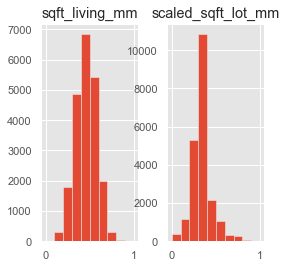

In [99]:
# # Create new min-max scaling features for a new dataframe
sqft_living = data_log['sqft_living_log']
sqft_lot = data_log['sqft_lot_log']



scaled_sqft_living = (sqft_living - min(sqft_living)) / (max(sqft_living) - min(sqft_living))
scaled_sqft_lot = (sqft_lot - min(sqft_lot)) / (max(sqft_lot) - min(sqft_lot))


data_cont_scaled = pd.DataFrame([])
data_cont_scaled['sqft_living_mm'] = scaled_sqft_living
data_cont_scaled['scaled_sqft_lot_mm'] = scaled_sqft_lot


data_cont_scaled.hist(figsize = [4, 4]);

Performing min-max scaling results in 'sqft_living' and 'sqft_lot' normal distributions. We can build a new model based on new modified features.

In [100]:
# Create a new dataframe with original categorical features and transformed features
final_df = pd.concat([data_cont_scaled, df_log_2], axis=1)
final_df.columns

Index(['sqft_living_mm', 'scaled_sqft_lot_mm', 'bedrooms_log', 'bathrooms_log',
       'sqft_living_log', 'sqft_lot_log', 'age_log', 'price', 'waterfront_YES',
       'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0', 'floors_3_5',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very_Good', 'grade_11_Excellent', 'grade_12_Luxury',
       'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better'],
      dtype='object')

In [101]:
# Drop non-transformed features from the dataframe
final_df = final_df.drop(['sqft_living_log', 'sqft_lot_log'], axis=1)
final_df.head()

,sqft_living_mm,scaled_sqft_lot_mm,bedrooms_log,bathrooms_log,age_log,price,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,0.322166,0.295858,1.098612,0.000000,4.204693,221900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.538392,0.326644,1.098612,0.810930,4.262680,538000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.203585,0.366664,0.693147,0.000000,4.488636,180000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.463123,0.280700,1.386294,1.098612,4.043051,604000.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.420302,0.340224,1.098612,0.693147,3.555348,510000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [102]:
# Create a new model
X = final_df.drop(['price'], axis=1)
y = final_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:32   Log-Likelihood:            -2.9625e+05
No. Observations:               21597   AIC:                         5.925e+05
Df Residuals:                   21571   BIC:                         5.928e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.842e+05   1.86e+04      9.924      0.000    1.48e+05    2.21e+05
sqft_living_mm       1.065e+06    2.8e+04     37.995      0.000    1.01e+06    1.12e+06
scaled_sqft_lot_mm  -3.577e+05    1.6e+04    -22.314      0.000   -3.89e+05   -3.26e+05
bedrooms_log         -7.95e+04   7250.789    -10.964      0.000   -9.37e+04   -6.53e+04
bathrooms_log        5.774e+04   6936.179      8.325      0.000    4.41e+04    7.13e+04
age_log              1.195e+05   3296.083     36.247      0.000    1.13e+05    1.26e+05
waterfront_YES       7.798e+05   1.85e+04     42.218      0.000    7.44e+05    8.16e+05
floors_1_5           2.654e+04   5655.639      4.692      0.000    1.55e+04    3.76e+04
floors_2_0          -4403.6585   4500.226     -0.979      0.328   -1.32e+04    4417.116
floors_2_5           1.395e+05   1.78e+04      7.839      0.000    1.05e+05    1.74e+05
floors_3_0           7.942e+04   1.06e+04      7.496      0.000    5.87e+04       1e+05
floors_3_5           1.686e+05   8.32e+04      2.027      0.043    5544.223    3.32e+05
condition_Fair      -1.005e+04   1.71e+04     -0.587      0.558   -4.37e+04    2.35e+04
condition_Good       1.958e+04   3767.966      5.197      0.000    1.22e+04     2.7e+04
condition_Poor       4667.4161   4.11e+04      0.114      0.910   -7.59e+04    8.53e+04
condition_Very_Good  7.089e+04   6001.503     11.811      0.000    5.91e+04    8.26e+04
grade_11_Excellent   3.542e+05   1.28e+04     27.567      0.000    3.29e+05    3.79e+05
grade_12_Luxury      9.595e+05   2.44e+04     39.366      0.000    9.12e+05    1.01e+06
grade_13_Mansion     2.389e+06   6.15e+04     38.864      0.000    2.27e+06    2.51e+06
grade_3_Poor        -4.869e+05    2.2e+05     -2.215      0.027   -9.18e+05    -5.6e+04
grade_4_Low         -5.059e+05   4.38e+04    -11.539      0.000   -5.92e+05    -4.2e+05
grade_5_Fair        -5.815e+05   1.74e+04    -33.334      0.000   -6.16e+05   -5.47e+05
grade_6_Low_Average -5.701e+05   1.06e+04    -53.929      0.000   -5.91e+05   -5.49e+05
grade_7_Average     -5.282e+05   8404.375    -62.844      0.000   -5.45e+05   -5.12e+05
grade_8_Good        -4.289e+05   7716.783    -55.579      0.000   -4.44e+05   -4.14e+05
grade_9_Better       -2.36e+05   7916.094    -29.809      0.000   -2.51e+05    -2.2e+05
==============================================================================
Omnibus:                    14027.453   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           659168.926
Skew:                           2.514   Prob(JB):                         0.00
Kurtosis:                      29.594   Cond. No.                         623.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

All of these variations of scaling and log transformations did not create a model that was much better than our original. We can explore the age categorial column and make dummy features from it to test if this will improve our performance.


In [103]:
# To view a small sample of DataFrame object
ohc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age,age_cat
0,7129300520,221900.0,3,1.00,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67,64-83
1,6414100192,538000.0,3,2.25,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71,64-83
2,5631500400,180000.0,2,1.00,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89,83-102
3,2487200875,604000.0,4,3.00,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57,45-64
4,1954400510,510000.0,3,2.00,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35,26-45


In [104]:
# Create dummy variables of 'age_cat' column values
age_dum = pd.get_dummies(ohc_df['age_cat'])
age_dum.head()

,7-26,26-45,45-64,64-83,83-102,102-122
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [105]:
# Combine dummy variables with our original dataframe
age_df = pd.concat([final_df, age_dum], axis=1)
age_df.head()

,sqft_living_mm,scaled_sqft_lot_mm,bedrooms_log,bathrooms_log,age_log,price,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,7-26,26-45,45-64,64-83,83-102,102-122
0,0.322166,0.295858,1.098612,0.000000,4.204693,221900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0.538392,0.326644,1.098612,0.810930,4.262680,538000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0.203585,0.366664,0.693147,0.000000,4.488636,180000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0.463123,0.280700,1.386294,1.098612,4.043051,604000.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0.420302,0.340224,1.098612,0.693147,3.555348,510000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [106]:
# Create new model
X = age_df.drop(['price'], axis=1)
y = age_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1352.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:32   Log-Likelihood:            -2.9574e+05
No. Observations:               21597   AIC:                         5.915e+05
Df Residuals:                   21565   BIC:                         5.918e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.042e+05   4.02e+04     12.536      0.000    4.25e+05    5.83e+05
sqft_living_mm       9.504e+05   2.76e+04     34.387      0.000    8.96e+05       1e+06
scaled_sqft_lot_mm  -1.752e+05   1.68e+04    -10.404      0.000   -2.08e+05   -1.42e+05
bedrooms_log         -6.64e+04   7213.954     -9.205      0.000   -8.05e+04   -5.23e+04
bathrooms_log        9.226e+04   6904.986     13.362      0.000    7.87e+04    1.06e+05
age_log              1.336e+04   7608.573      1.756      0.079   -1549.085    2.83e+04
waterfront_YES       7.637e+05   1.81e+04     42.296      0.000    7.28e+05    7.99e+05
floors_1_5          -1.399e+04   5983.615     -2.338      0.019   -2.57e+04   -2264.294
floors_2_0          -1.193e+04   4651.318     -2.564      0.010    -2.1e+04   -2811.221
floors_2_5           1.007e+05   1.76e+04      5.737      0.000    6.63e+04    1.35e+05
floors_3_0            6.36e+04   1.04e+04      6.095      0.000    4.31e+04    8.41e+04
floors_3_5           1.578e+05   8.13e+04      1.941      0.052   -1541.377    3.17e+05
condition_Fair      -1.977e+04   1.67e+04     -1.180      0.238   -5.26e+04    1.31e+04
condition_Good       2.682e+04   3725.006      7.200      0.000    1.95e+04    3.41e+04
condition_Poor      -2.456e+04   4.02e+04     -0.611      0.541   -1.03e+05    5.42e+04
condition_Very_Good  5.939e+04   5888.421     10.086      0.000    4.78e+04    7.09e+04
grade_11_Excellent   3.545e+05   1.26e+04     28.227      0.000     3.3e+05    3.79e+05
grade_12_Luxury      9.497e+05   2.38e+04     39.866      0.000    9.03e+05    9.96e+05
grade_13_Mansion     2.379e+06   6.01e+04     39.613      0.000    2.26e+06     2.5e+06
grade_3_Poor        -5.489e+05   2.15e+05     -2.555      0.011    -9.7e+05   -1.28e+05
grade_4_Low         -5.656e+05   4.29e+04    -13.195      0.000    -6.5e+05   -4.82e+05
grade_5_Fair         -6.31e+05   1.71e+04    -36.838      0.000   -6.65e+05   -5.97e+05
grade_6_Low_Average -5.991e+05   1.04e+04    -57.709      0.000   -6.19e+05   -5.79e+05
grade_7_Average     -5.284e+05   8219.286    -64.291      0.000   -5.45e+05   -5.12e+05
grade_8_Good        -4.243e+05   7546.578    -56.228      0.000   -4.39e+05    -4.1e+05
grade_9_Better      -2.407e+05   7734.078    -31.126      0.000   -2.56e+05   -2.26e+05
7-26                -4.407e+04   3.54e+04     -1.243      0.214   -1.14e+05    2.54e+04
26-45                -5.36e+04    3.7e+04     -1.448      0.148   -1.26e+05     1.9e+04
45-64                 3.58e+04   3.82e+04      0.936      0.349   -3.91e+04    1.11e+05
64-83                1.363e+05   3.91e+04      3.486      0.000    5.97e+04    2.13e+05
83-102               1.921e+05   4.02e+04      4.773      0.000    1.13e+05    2.71e+05
102-122              2.079e+05   4.09e+04      5.083      0.000    1.28e+05    2.88e+05
===

The modification did not improve our model. let's remove the features with p-values above alpha.


In [107]:
# Remove the features with p-values above alpha
p_df = age_df.drop(['floors_1_5','condition_Poor', 'condition_Fair', 'floors_3_5', '7-26', '26-45'], axis=1)

In [108]:
# Create new model
X = p_df.drop(['price'], axis=1)
y = p_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1675.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:32   Log-Likelihood:            -2.9574e+05
No. Observations:               21597   AIC:                         5.915e+05
Df Residuals:                   21571   BIC:                         5.917e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.825e+05   2.06e+04     23.436      0.000    4.42e+05    5.23e+05
sqft_living_mm       9.488e+05   2.76e+04     34.429      0.000    8.95e+05       1e+06
scaled_sqft_lot_mm  -1.793e+05   1.67e+04    -10.730      0.000   -2.12e+05   -1.47e+05
bedrooms_log        -6.855e+04   7161.235     -9.572      0.000   -8.26e+04   -5.45e+04
bathrooms_log         9.32e+04   6895.764     13.516      0.000    7.97e+04    1.07e+05
age_log              5681.6408   4879.709      1.164      0.244   -3882.951    1.52e+04
waterfront_YES       7.632e+05   1.81e+04     42.263      0.000    7.28e+05    7.99e+05
floors_2_0          -9756.9552   4522.320     -2.158      0.031   -1.86e+04    -892.873
floors_2_5           1.042e+05   1.75e+04      5.968      0.000       7e+04    1.38e+05
floors_3_0           6.521e+04   1.04e+04      6.278      0.000    4.49e+04    8.56e+04
condition_Good       2.697e+04   3694.058      7.301      0.000    1.97e+04    3.42e+04
condition_Very_Good  5.959e+04   5872.646     10.148      0.000    4.81e+04    7.11e+04
grade_11_Excellent   3.553e+05   1.26e+04     28.302      0.000    3.31e+05     3.8e+05
grade_12_Luxury      9.533e+05   2.38e+04     40.069      0.000    9.07e+05       1e+06
grade_13_Mansion     2.383e+06   6.01e+04     39.678      0.000    2.27e+06     2.5e+06
grade_3_Poor         -5.44e+05   2.15e+05     -2.532      0.011   -9.65e+05   -1.23e+05
grade_4_Low          -5.68e+05   4.28e+04    -13.272      0.000   -6.52e+05   -4.84e+05
grade_5_Fair        -6.319e+05    1.7e+04    -37.089      0.000   -6.65e+05   -5.99e+05
grade_6_Low_Average -5.993e+05   1.04e+04    -57.820      0.000    -6.2e+05   -5.79e+05
grade_7_Average     -5.288e+05   8213.894    -64.384      0.000   -5.45e+05   -5.13e+05
grade_8_Good        -4.248e+05   7544.232    -56.306      0.000    -4.4e+05    -4.1e+05
grade_9_Better      -2.408e+05   7734.959    -31.135      0.000   -2.56e+05   -2.26e+05
45-64                9.214e+04   5652.291     16.301      0.000    8.11e+04    1.03e+05
64-83                1.934e+05   6813.014     28.390      0.000     1.8e+05    2.07e+05
83-102               2.464e+05   8834.148     27.887      0.000    2.29e+05    2.64e+05
102-122              2.637e+05   9733.553     27.088      0.000    2.45e+05    2.83e+05
==============================================================================
Omnibus:                    14198.617   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           718538.348
Skew:                           2.537   Prob(JB):                         0.00
Kurtosis:                      30.798   Cond. No.                         625.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

In [109]:
# Create dummies of bedrooms
bed_dum = pd.get_dummies(ohc_df['bedrooms'], prefix='bed')

In [110]:
# Add dummies to our previous dataframe
bed_df = pd.concat([ohc_df, bed_dum], axis=1)
bed_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age,age_cat,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33
0,7129300520,221900.0,3,1.00,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67,64-83,0,0,1,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71,64-83,0,0,1,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89,83-102,0,1,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57,45-64,0,0,0,1,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35,26-45,0,0,1,0,0,0,0,0,0,0,0,0


In [111]:
# Create dummies of age 
age_dum = pd.get_dummies(bed_df['age_cat'])


In [112]:
# Add dummies to our previous dataframe
age_bed_dum = pd.concat([bed_df, age_dum], axis=1)
age_bed_dum.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age,age_cat,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33,7-26,26-45,45-64,64-83,83-102,102-122
0,7129300520,221900.0,3,1.00,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67,64-83,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71,64-83,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89,83-102,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2487200875,604000.0,4,3.00,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57,45-64,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35,26-45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [113]:
# Create dummies of bathrooms 
bath_dum = pd.get_dummies(age_bed_dum['bathrooms'],prefix = 'bath')

In [114]:
# Add dummies to our previous dataframe
age_bed_bath_dum = pd.concat([age_bed_dum, bath_dum], axis=1)
age_bed_bath_dum.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,age,age_cat,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33,7-26,26-45,45-64,64-83,83-102,102-122,bath_0.5,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,bath_3.75,bath_4.0,bath_4.25,bath_4.5,bath_4.75,bath_5.0,bath_5.25,bath_5.5,bath_5.75,bath_6.0,bath_6.25,bath_6.5,bath_6.75,bath_7.5,bath_7.75,bath_8.0
0,7129300520,221900.0,3,1.00,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,67,64-83,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71,64-83,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89,83-102,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,57,45-64,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,35,26-45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
# Drop the bedrooms column from our dataframe
model_df = age_bed_bath_dum.drop(['bedrooms', 'bathrooms','age','age_cat'], axis=1)
model_df.head()

,id,price,sqft_living,sqft_lot,waterfront_YES,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33,7-26,26-45,45-64,64-83,83-102,102-122,bath_0.5,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,bath_3.75,bath_4.0,bath_4.25,bath_4.5,bath_4.75,bath_5.0,bath_5.25,bath_5.5,bath_5.75,bath_6.0,bath_6.25,bath_6.5,bath_6.75,bath_7.5,bath_7.75,bath_8.0
0,7129300520,221900.0,1180,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,2570,7242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,770,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,1960,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,1680,8080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
# Create a new model with this dataframe
X = model_df.drop(['price', 'id'], axis=1)
y = model_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     718.5
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:33   Log-Likelihood:            -2.9471e+05
No. Observations:               21597   AIC:                         5.896e+05
Df Residuals:                   21529   BIC:                         5.901e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.147e+05   4.38e+04     16.332      0.000    6.29e+05       8e+05
sqft_living           143.4133      3.320     43.200      0.000     136.906     149.920
sqft_lot               -0.2304      0.035     -6.626      0.000      -0.298      -0.162
waterfront_YES       7.197e+05   1.73e+04     41.558      0.000    6.86e+05    7.54e+05
floors_1_5          -1857.7894   5744.692     -0.323      0.746   -1.31e+04    9402.233
floors_2_0          -1247.2564   4559.662     -0.274      0.784   -1.02e+04    7690.019
floors_2_5           9.518e+04   1.68e+04      5.652      0.000    6.22e+04    1.28e+05
floors_3_0           8.598e+04   9757.653      8.811      0.000    6.68e+04    1.05e+05
floors_3_5           1.625e+05    7.8e+04      2.082      0.037    9477.701    3.15e+05
condition_Fair      -2.706e+04    1.6e+04     -1.693      0.090   -5.84e+04    4264.026
condition_Good       2.614e+04   3560.808      7.341      0.000    1.92e+04    3.31e+04
condition_Poor      -3.325e+04   3.84e+04     -0.867      0.386   -1.08e+05     4.2e+04
condition_Very_Good  6.443e+04   5633.547     11.437      0.000    5.34e+04    7.55e+04
grade_11_Excellent   2.378e+05   1.24e+04     19.251      0.000    2.14e+05    2.62e+05
grade_12_Luxury      6.427e+05   2.42e+04     26.569      0.000    5.95e+05     6.9e+05
grade_13_Mansion     1.426e+06   6.49e+04     21.972      0.000     1.3e+06    1.55e+06
grade_3_Poor        -5.822e+05   2.07e+05     -2.815      0.005   -9.88e+05   -1.77e+05
grade_4_Low         -5.716e+05   4.27e+04    -13.377      0.000   -6.55e+05   -4.88e+05
grade_5_Fair        -5.916e+05   1.65e+04    -35.909      0.000   -6.24e+05   -5.59e+05
grade_6_Low_Average -5.344e+05   1.01e+04    -52.790      0.000   -5.54e+05   -5.15e+05
grade_7_Average     -4.305e+05   8340.815    -51.617      0.000   -4.47e+05   -4.14e+05
grade_8_Good        -3.252e+05   7703.577    -42.216      0.000    -3.4e+05    -3.1e+05
grade_9_Better      -1.741e+05   7598.631    -22.917      0.000   -1.89e+05   -1.59e+05
bed_1                1.521e+05   2.99e+04      5.096      0.000    9.36e+04    2.11e+05
bed_2                1.488e+05   2.65e+04      5.613      0.000    9.68e+04    2.01e+05
bed_3                1.158e+05   2.62e+04      4.419      0.000    6.45e+04    1.67e+05
bed_4                8.403e+04   2.62e+04      3.205      0.001    3.26e+04    1.35e+05
bed_5                8.518e+04   2.65e+04      3.215      0.001    3.33e+04    1.37e+05
bed_6                3.294e+04   2.84e+04      1.158      0.247   -2.28e+04    8.87e+04
bed_7               -5.794e+04   4.07e+04     -1.425      0.154   -1.38e+05    2.18e+04
bed_8                1.672e+05   5.91e+04      2.830      0.005    5.14e+04    2.83e+05
bed_9               -6.333e+04   8.85e+04     -0.716      0.474   -2.37e+05     1.1e+05
bed

We were able to improve the Adj. R squared value by 0.016, but have introduced several features with p-values higher than 0.05. Let's remove those and try again.

In [117]:
X = model_df.drop(['price', 'id', 'floors_1_5','floors_2_0','condition_Poor','bed_6',
                'bed_7', 'bed_9', 'bed_10', 'bed_11', 'bed_33','7-26','26-45','bath_5.0',
                  'bath_5.75','bath_6.75','bath_7.5'], axis=1)
y = model_df['price']

X_int = sm.add_constant(X)
model_mm = sm.OLS(y,X_int).fit()
model_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     890.9
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:33   Log-Likelihood:            -2.9472e+05
No. Observations:               21597   AIC:                         5.895e+05
Df Residuals:                   21542   BIC:                         5.900e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 7.23e+05    4.4e+04     16.417      0.000    6.37e+05    8.09e+05
sqft_living           143.1155      3.311     43.228      0.000     136.626     149.605
sqft_lot               -0.2288      0.035     -6.613      0.000      -0.297      -0.161
waterfront_YES       7.193e+05   1.73e+04     41.608      0.000    6.85e+05    7.53e+05
floors_2_5           9.575e+04   1.65e+04      5.814      0.000    6.35e+04    1.28e+05
floors_3_0           8.752e+04   8815.916      9.927      0.000    7.02e+04    1.05e+05
floors_3_5           1.635e+05   7.79e+04      2.098      0.036    1.07e+04    3.16e+05
condition_Fair      -2.651e+04    1.6e+04     -1.660      0.097   -5.78e+04    4786.704
condition_Good       2.631e+04   3469.117      7.585      0.000    1.95e+04    3.31e+04
condition_Very_Good  6.477e+04   5589.712     11.588      0.000    5.38e+04    7.57e+04
grade_11_Excellent   2.379e+05   1.23e+04     19.271      0.000    2.14e+05    2.62e+05
grade_12_Luxury      6.462e+05   2.41e+04     26.814      0.000    5.99e+05    6.93e+05
grade_13_Mansion     1.449e+06   6.43e+04     22.526      0.000    1.32e+06    1.57e+06
grade_3_Poor        -5.824e+05   2.07e+05     -2.816      0.005   -9.88e+05   -1.77e+05
grade_4_Low         -5.732e+05   4.27e+04    -13.427      0.000   -6.57e+05    -4.9e+05
grade_5_Fair        -5.931e+05   1.64e+04    -36.218      0.000   -6.25e+05   -5.61e+05
grade_6_Low_Average  -5.35e+05   1.01e+04    -53.156      0.000   -5.55e+05   -5.15e+05
grade_7_Average     -4.311e+05   8287.854    -52.016      0.000   -4.47e+05   -4.15e+05
grade_8_Good        -3.256e+05   7676.308    -42.421      0.000   -3.41e+05   -3.11e+05
grade_9_Better      -1.743e+05   7582.681    -22.985      0.000   -1.89e+05   -1.59e+05
bed_1                1.325e+05   2.01e+04      6.579      0.000     9.3e+04    1.72e+05
bed_2                1.292e+05   1.34e+04      9.645      0.000    1.03e+05    1.56e+05
bed_3                9.612e+04   1.25e+04      7.669      0.000    7.16e+04    1.21e+05
bed_4                6.439e+04   1.23e+04      5.233      0.000    4.03e+04    8.85e+04
bed_5                  6.6e+04   1.28e+04      5.152      0.000    4.09e+04    9.11e+04
bed_8                1.489e+05   5.87e+04      2.538      0.011    3.39e+04    2.64e+05
45-64                  8.1e+04   4444.065     18.227      0.000    7.23e+04    8.97e+04
64-83                1.774e+05   4971.022     35.694      0.000    1.68e+05    1.87e+05
83-102               2.436e+05   6224.227     39.144      0.000    2.31e+05    2.56e+05
102-122              2.635e+05   6549.559     40.236      0.000    2.51e+05    2.76e+05
bath_0.5            -4.389e+05    1.1e+05     -3.983      0.000   -6.55e+05   -2.23e+05
bath_0.75           -3.909e+05   4.86e+04     -8.052      0.000   -4.86e+05   -2.96e+05
bat

We were able to increase the Adj R squared value by an entire thousandth through rigorous experimentation. Adj R = 0.691 means 69.1% of the variations in price 𝑦 are explained by the features in our model. It is not a strong R square. But the coefficients of the variables are quite strong.

In [118]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [119]:
# Create train and test datasets from data frame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

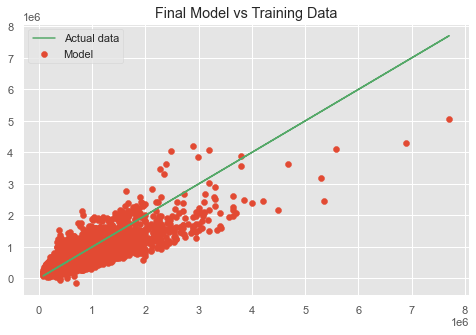

In [120]:
# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatterplot on the figure of y-train
plt.scatter(y_train, y_hat_train, label='Model')
# Plot y_hat_train
plt.plot(y_train, y_train, label='Actual data', color='g')
plt.title('Final Model vs Training Data')
plt.legend();

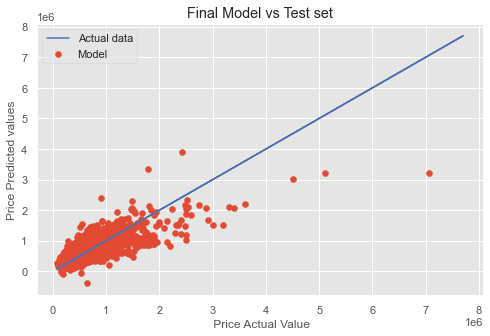

In [121]:
# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_test, y_hat_test, label='Model')
plt.plot(y_train, y_train, label='Actual data', color='b')
plt.title('Final Model vs Test set')
plt.xlabel(' Price Actual Value')
plt.ylabel ('Price Predicted values')
plt.legend();

# Interpret Model

## Linearity of Final Model

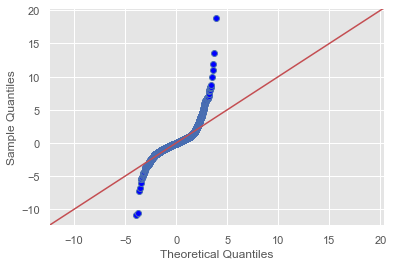

In [122]:
plt.style.use('ggplot')
resid1 = model_mm.resid


fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)


## Prediction vs. Actual values

In [123]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [124]:
# Create train and test datasets from data frame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# Create linear regression object
linreg = LinearRegression()
# Fit lr object to training data
linreg.fit(X_train, y_train)

# Create price predictions on train and test data from the independent variables
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [126]:
# Compute MSE for train and test set
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 40689301918.244
Test Mean Squared Error: 48791523736.88152


According to the Adj R squared value, linearity of the model, and the MSE results we could not improve our model through the aforementioned process. Our model needs further refinements.

# Further Refinements

 Interaction between variables is where two or more variables interact in a non-additive manner when affecting a third variable. not accounting for interactions might lead to wrong results. 

In [127]:
# Check name of columns
model_df.columns

Index(['id', 'price', 'sqft_living', 'sqft_lot', 'waterfront_YES',
       'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0', 'floors_3_5',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very_Good', 'grade_11_Excellent', 'grade_12_Luxury',
       'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better', 'bed_1', 'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6',
       'bed_7', 'bed_8', 'bed_9', 'bed_10', 'bed_11', 'bed_33', '7-26',
       '26-45', '45-64', '64-83', '83-102', '102-122', 'bath_0.5', 'bath_0.75',
       'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0',
       'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25',
       'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
       'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_5.75',
       'bath_6.0', 'bath_6.25', 'bath_6.5', 'bath_6.75', 'bath_7.5',
       

According to the EDA insights we chose the house condition feature to check its interaction with other features. 

In [128]:
model_df['condition_Very_Good'].value_counts()

0    19896
1     1701
Name: condition_Very_Good, dtype: int64

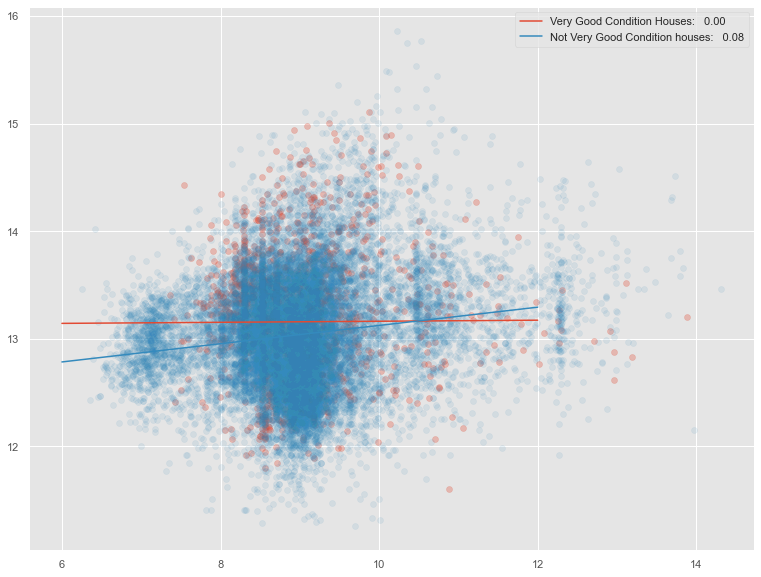

In [129]:
fig, ax = plt.subplots(figsize=(13, 10))

col = 'sqft_lot'

is_in = model_df.loc[model_df['condition_Very_Good'] == 1, [col, 'price']]

linreg = LinearRegression()
linreg.fit(np.log(is_in[[col]]), np.log(is_in['price']))

preds = linreg.predict(np.log(is_in[[col]]))

ax.scatter(np.log(is_in[[col]]), np.log(is_in['price']), alpha=.3, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'Very Good Condition Houses:   {linreg.coef_[0]:.2f}')

not_in = model_df.loc[model_df['condition_Very_Good'] == 0, [col, 'price']]

linreg = LinearRegression()
linreg.fit(np.log(not_in[[col]]), np.log(not_in['price']))

preds = linreg.predict(np.log(not_in[[col]]))

ax.scatter(np.log(not_in[[col]]), np.log(not_in['price']), alpha=.1, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'Not Very Good Condition houses:   {linreg.coef_[0]:.2f}')

ax.legend()

## Build a final model with interactions

Using the above interaction to build a new model with 10-fold cross-validation.

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = model_df.drop('price', axis=1)
y = model_df['price']
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

final['condition_Very_Good*sqft_lot'] = final['condition_Very_Good'] * final['sqft_lot']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

0.6570930987304651

The R squared value did not improve considering this interaction. So, we do not consider this further refinement.

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = model_df.drop('price', axis=1)
y = model_df['price']
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

final['sqft_living*sqft_lot'] = final['sqft_living'] * final['sqft_lot']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

0.6627329459491447

In [132]:
# Create a new column of our y_hat values in our last dataframe
model_df['y_hat'] = model_mm.predict()
# Create a residual column in our last dataframe
model_df['resid'] = model_df['y_hat'] - model_df['price']
# Use .describe() to view IQR of residuals
model_df['resid'].describe()

count    2.159700e+04
mean    -1.650918e-09
std      2.043027e+05
min     -3.856313e+06
25%     -8.487772e+04
50%      1.102861e+04
75%      1.055685e+05
max      2.234380e+06
Name: resid, dtype: float64

<AxesSubplot:xlabel='resid', ylabel='Density'>

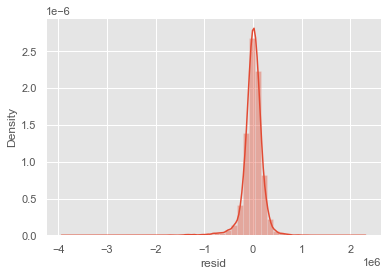

In [133]:
# Check if residuals are normally distributed
sns.distplot(model_df['resid'], kde=True)

In [134]:
low = model_df[model_df['resid'] < -100000]
high = model_df[model_df['resid'] > 100000]

print(f'The model underestimated {round(len(low)/len(model_df)*100,2)}% of house prices by over 100,000')
print(f'The model overestimated {round(len(high)/len(model_df)*100,2)}% house prices by over 100,000')

The model underestimated 21.93% of house prices by over 100,000
The model overestimated 26.32% house prices by over 100,000


# Conclusion

- Adjusted R squared:  
>We were able to increase the Adj R squared value by an entire thousandth through rigorous experimentation. The baseline model Adj R is 0.675. The final model Adj R is 0.691 which means 69.1% of the variations in price 𝑦 are explained by the features in our model. It is not a strong R square. But the coefficients of the variables are quite strong.

- Coefficients:
>Most variables have high values for coefficients. 'grade_13_Mansion' has the highest coefficient. Other determiners of house price are waterfront views, condition, floors, age, and bathrooms.

- P-values:
>All the p-values are quite low, which indicates there is sufficient evidence in the sample to conclude that a correlation exists.

- Mean Squared Error (MSE):
>The model underestimated 21.93% of house prices by over 100,000 and overestimated 26.32% of house prices by over 100,000.